In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.makedirs('visuals', exist_ok=True) # To save the graph in visual folder

In [6]:
customers = pd.read_csv(r"C:\Users\adars\Downloads\Hero Vired\HeroFinCorp Project\Datasets\customers.csv")
transactions = pd.read_csv(r"C:\Users\adars\Downloads\Hero Vired\HeroFinCorp Project\Datasets\transactions.csv")
applications = pd.read_csv(r"C:\Users\adars\Downloads\Hero Vired\HeroFinCorp Project\Datasets\applications.csv")
branches = pd.read_csv(r"C:\Users\adars\Downloads\Hero Vired\HeroFinCorp Project\Datasets\branches.csv")
defaults= pd.read_csv(r"C:\Users\adars\Downloads\Hero Vired\HeroFinCorp Project\Datasets\defaults.csv")
loans = pd.read_csv(r"C:\Users\adars\Downloads\Hero Vired\HeroFinCorp Project\Datasets\loans.csv")


C:\Users\adars\AppData\Local\Temp\ipykernel_20596\599079681.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  applications = pd.read_csv(r"C:\Users\adars\Downloads\Hero Vired\HeroFinCorp Project\Datasets\applications.csv")


In [7]:

for df, name in zip([customers, loans, applications, transactions, branches, defaults],
                    ['customers', 'loans', 'applications', 'transactions', 'branches', 'defaults']):
    print(f"==== {name} ====")
    print(df.shape)  # rows, columns
    print(df.dtypes)
    print()
    print()
    


==== customers ====
(70000, 14)
Customer_ID                object
Full_Name                  object
Contact_Number              int64
Email                      object
Address                    object
Age                         int64
Gender                     object
Marital_Status             object
Employment_Status          object
Annual_Income               int64
Credit_Score                int64
Region                     object
Account_Tenure             object
Relationship_Manager_ID    object
dtype: object


==== loans ====
(90000, 12)
Loan_ID                  object
Customer_ID              object
Loan_Amount               int64
Interest_Rate           float64
Loan_Term                 int64
Disbursal_Date           object
Repayment_Start_Date     object
Repayment_End_Date       object
Loan_Status              object
Overdue_Amount            int64
EMI_Amount                int64
Collateral_Details       object
dtype: object


==== applications ====
(82600, 10)
Application_I

In [8]:
# Type casting object to Numeric
# Also we can call data parsing ( meaning data extraction from text)
#regex based numeric data extracting ( using regular expression)
customers['Account_Tenure'] = pd.to_numeric(customers['Account_Tenure'].str.extract(r'(\d+)')[0], errors='coerce')

In [9]:
# Fix Contact_Number # converting into text becase this numeric data will not be used for calculation
customers['Contact_Number'] = customers['Contact_Number'].astype(str)

In [10]:
customers.info() # rechecking data after typecasting/parsing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Customer_ID              70000 non-null  object
 1   Full_Name                70000 non-null  object
 2   Contact_Number           70000 non-null  object
 3   Email                    70000 non-null  object
 4   Address                  70000 non-null  object
 5   Age                      70000 non-null  int64 
 6   Gender                   70000 non-null  object
 7   Marital_Status           70000 non-null  object
 8   Employment_Status        70000 non-null  object
 9   Annual_Income            70000 non-null  int64 
 10  Credit_Score             70000 non-null  int64 
 11  Region                   70000 non-null  object
 12  Account_Tenure           70000 non-null  int64 
 13  Relationship_Manager_ID  70000 non-null  object
dtypes: int64(4), object(10)
memory usage: 

In [11]:
#dropping duplicate values
customers=customers.drop_duplicates()
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Customer_ID              70000 non-null  object
 1   Full_Name                70000 non-null  object
 2   Contact_Number           70000 non-null  object
 3   Email                    70000 non-null  object
 4   Address                  70000 non-null  object
 5   Age                      70000 non-null  int64 
 6   Gender                   70000 non-null  object
 7   Marital_Status           70000 non-null  object
 8   Employment_Status        70000 non-null  object
 9   Annual_Income            70000 non-null  int64 
 10  Credit_Score             70000 non-null  int64 
 11  Region                   70000 non-null  object
 12  Account_Tenure           70000 non-null  int64 
 13  Relationship_Manager_ID  70000 non-null  object
dtypes: int64(4), object(10)
memory usage: 

In [12]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               90000 non-null  object 
 1   Customer_ID           90000 non-null  object 
 2   Loan_Amount           90000 non-null  int64  
 3   Interest_Rate         90000 non-null  float64
 4   Loan_Term             90000 non-null  int64  
 5   Disbursal_Date        90000 non-null  object 
 6   Repayment_Start_Date  90000 non-null  object 
 7   Repayment_End_Date    90000 non-null  object 
 8   Loan_Status           90000 non-null  object 
 9   Overdue_Amount        90000 non-null  int64  
 10  EMI_Amount            90000 non-null  int64  
 11  Collateral_Details    59806 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 8.2+ MB


Disbursal_Date	object	❌ datetime	Should convert to datetime for date operations
Repayment_Start_Date	object	❌ datetime	Same — convert to datetime
Repayment_End_Date	object	❌ datetime	Same — convert to datetime

 TypeCasting : Why this matters
👉 Once converted:

We can compute date differences (e.g. disbursal → repayment start)

We can filter based on dates

We can plot time series

In [15]:
loans['Disbursal_Date'] =pd.to_datetime(loans['Disbursal_Date'], errors ='coerce')
loans['Repayment_Start_Date'] =pd.to_datetime(loans['Repayment_Start_Date'], errors ='coerce')
loans['Repayment_End_Date'] =pd.to_datetime(loans['Repayment_End_Date'], errors ='coerce')

loans.info() # checking after typecasting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Loan_ID               90000 non-null  object        
 1   Customer_ID           90000 non-null  object        
 2   Loan_Amount           90000 non-null  int64         
 3   Interest_Rate         90000 non-null  float64       
 4   Loan_Term             90000 non-null  int64         
 5   Disbursal_Date        90000 non-null  datetime64[ns]
 6   Repayment_Start_Date  90000 non-null  datetime64[ns]
 7   Repayment_End_Date    90000 non-null  datetime64[ns]
 8   Loan_Status           90000 non-null  object        
 9   Overdue_Amount        90000 non-null  int64         
 10  EMI_Amount            90000 non-null  int64         
 11  Collateral_Details    59806 non-null  object        
dtypes: datetime64[ns](3), float64(1), int64(4), object(4)
memory usage: 8.2+ M

In [16]:
print(loans['Collateral_Details'].isnull().sum())


30194


In [17]:
applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82600 entries, 0 to 82599
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Application_ID    82600 non-null  object
 1   Loan_ID           70000 non-null  object
 2   Customer_ID       82600 non-null  object
 3   Application_Date  82600 non-null  object
 4   Approval_Date     70000 non-null  object
 5   Loan_Purpose      82600 non-null  object
 6   Source_Channel    82600 non-null  object
 7   Processing_Fee    82600 non-null  int64 
 8   Approval_Status   82600 non-null  object
 9   Rejection_Reason  12600 non-null  object
dtypes: int64(1), object(9)
memory usage: 6.3+ MB


In [18]:
applications['Application_Date'] = pd.to_datetime(applications['Application_Date'], errors='coerce')
applications['Approval_Date'] = pd.to_datetime(applications['Approval_Date'], errors='coerce')
applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82600 entries, 0 to 82599
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Application_ID    82600 non-null  object        
 1   Loan_ID           70000 non-null  object        
 2   Customer_ID       82600 non-null  object        
 3   Application_Date  82600 non-null  datetime64[ns]
 4   Approval_Date     70000 non-null  datetime64[ns]
 5   Loan_Purpose      82600 non-null  object        
 6   Source_Channel    82600 non-null  object        
 7   Processing_Fee    82600 non-null  int64         
 8   Approval_Status   82600 non-null  object        
 9   Rejection_Reason  12600 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 6.3+ MB


In [19]:
applications.isnull().sum()

Application_ID          0
Loan_ID             12600
Customer_ID             0
Application_Date        0
Approval_Date       12600
Loan_Purpose            0
Source_Channel          0
Processing_Fee          0
Approval_Status         0
Rejection_Reason    70000
dtype: int64

In [20]:
applications.head()

,Application_ID,Loan_ID,Customer_ID,Application_Date,Approval_Date,Loan_Purpose,Source_Channel,Processing_Fee,Approval_Status,Rejection_Reason
0,A000001,L000001,C000001,2022-05-11,2020-10-02,Business,Agent,6427,Approved,NaN
1,A000002,L000002,C000002,2022-03-18,2022-11-29,Education,Online,8605,Approved,NaN
2,A000003,L000003,C000003,2022-01-17,2023-07-01,Business,Online,1450,Approved,NaN
3,A000004,L000004,C000004,2019-03-09,2024-08-30,Home Renovation,Agent,8171,Approved,NaN
4,A000005,L000005,C000005,2024-07-18,2020-03-18,Education,Branch,4931,Approved,NaN


In [21]:
#applications['Rejection_Reason'].unique()


In [22]:
transactions.head()

,Transaction_ID,Loan_ID,Customer_ID,Transaction_Date,Payment_Type,Amount,Overdue_Fee,Remaining_Balance,Mode_of_Payment
0,T00000001,L005588,C050792,2021-04-30,EMI,46099,1313,1513669,NEFT
1,T00000002,L019942,C008919,2021-12-14,Penalty,43648,4852,901455,UPI
2,T00000003,L014848,C016745,2021-01-26,EMI,1810,0,1922629,Cash
3,T00000004,L041104,C039957,2021-02-18,Penalty,8607,708,213581,UPI
4,T00000005,L002488,C056156,2024-12-07,Penalty,34720,0,411621,UPI


In [23]:
transactions['Transaction_Date']= pd.to_datetime(transactions['Transaction_Date'], errors='coerce')

In [24]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495000 entries, 0 to 494999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Transaction_ID     495000 non-null  object        
 1   Loan_ID            495000 non-null  object        
 2   Customer_ID        495000 non-null  object        
 3   Transaction_Date   495000 non-null  datetime64[ns]
 4   Payment_Type       495000 non-null  object        
 5   Amount             495000 non-null  int64         
 6   Overdue_Fee        495000 non-null  int64         
 7   Remaining_Balance  495000 non-null  int64         
 8   Mode_of_Payment    495000 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 34.0+ MB


In [25]:
branches.head()

,Branch_ID,Branch_Name,Region,Total_Customers,Total_Active_Loans,Delinquent_Loans,Loan_Disbursement_Amount,Avg_Processing_Time,Relationship_Manager_Count
0,B001,"Dhar, Kant and Madan",West,2891,279,21,341680882,6,29
1,B002,Shan Group,East,4459,1201,149,96549019,8,35
2,B003,Sachdev-Banerjee,Central,2504,122,168,445787808,12,48
3,B004,Kapadia-Brar,East,1542,1422,96,353934299,9,50
4,B005,"Mangal, Kaur and Borde",South,945,1613,87,311637902,11,10


In [26]:
defaults.head()

,Default_ID,Loan_ID,Customer_ID,Default_Date,Default_Amount,Default_Reason,Recovery_Status,Recovery_Amount,Legal_Action
0,D000001,L007312,C007312,2022-07-20,94480,Job Loss,Full,30360,Yes
1,D000002,L028234,C028234,2023-09-23,10912,Job Loss,Partial,0,Yes
2,D000003,L008319,C008319,2024-08-04,73711,Other,NaN,9866,Yes
3,D000004,L046668,C046668,2021-10-16,48955,Other,NaN,0,Yes
4,D000005,L082934,C082934,2024-10-07,56952,Medical Emergency,NaN,0,No


In [27]:
defaults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Default_ID       9000 non-null   object
 1   Loan_ID          9000 non-null   object
 2   Customer_ID      9000 non-null   object
 3   Default_Date     9000 non-null   object
 4   Default_Amount   9000 non-null   int64 
 5   Default_Reason   9000 non-null   object
 6   Recovery_Status  6015 non-null   object
 7   Recovery_Amount  9000 non-null   int64 
 8   Legal_Action     9000 non-null   object
dtypes: int64(2), object(7)
memory usage: 632.9+ KB


In [28]:
defaults['Default_Date']= pd.to_datetime(defaults['Default_Date'], errors= 'coerce')
defaults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Default_ID       9000 non-null   object        
 1   Loan_ID          9000 non-null   object        
 2   Customer_ID      9000 non-null   object        
 3   Default_Date     9000 non-null   datetime64[ns]
 4   Default_Amount   9000 non-null   int64         
 5   Default_Reason   9000 non-null   object        
 6   Recovery_Status  6015 non-null   object        
 7   Recovery_Amount  9000 non-null   int64         
 8   Legal_Action     9000 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 632.9+ KB


In [29]:
#Checking outliers for Loan_Amount, Interest_Rate, Deafault_Amount
pd.set_option('display.float_format', '{:,.0f}'.format) #this is changing from scientific ( exponential) to float

print(loans['Loan_Amount'].describe())
print(loans['Interest_Rate'].describe())
print(defaults['Default_Amount'].describe())


count      90,000
mean    2,516,259
std     1,429,289
min        50,026
25%     1,275,705
50%     2,510,076
75%     3,751,702
max     4,999,958
Name: Loan_Amount, dtype: float64
count   90,000
mean        11
std          2
min          7
25%          9
50%         11
75%         13
max         15
Name: Interest_Rate, dtype: float64
count    9,000
mean    52,979
std     27,460
min      5,010
25%     29,486
50%     53,486
75%     77,012
max     99,997
Name: Default_Amount, dtype: float64


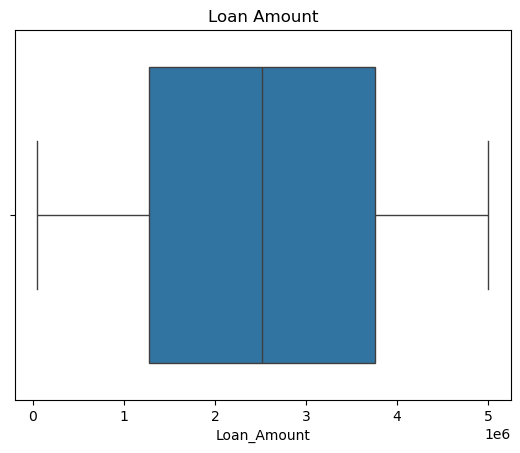

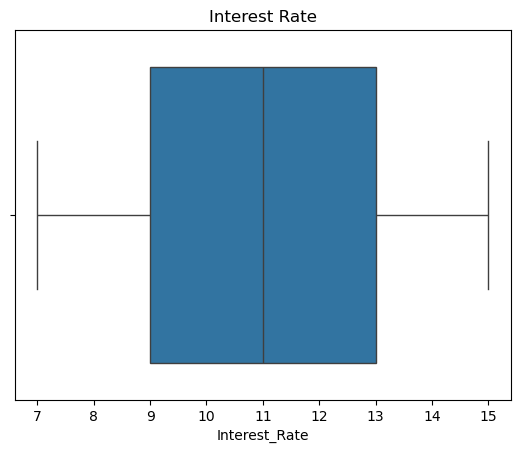

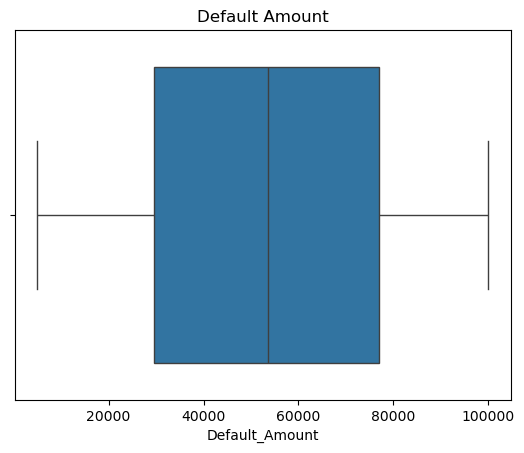

In [30]:
#Checking outliers via Box Plot

# 1. Loan Amount
sns.boxplot(x=loans['Loan_Amount'])
plt.title("Loan Amount")
plt.show()

# 2. Interest Rate
sns.boxplot(x=loans['Interest_Rate'])
plt.title("Interest Rate")
plt.show()

# 3. Default Amount
sns.boxplot(x=defaults['Default_Amount'])
plt.title("Default Amount")
plt.show()



2. Descriptive Analysis
● Summarize and visualize key metrics:
o Distribution of Loan_Amount, EMI_Amount, and Credit_Score.
o Regional trends in loan disbursement and defaults.
o Monthly trends in loan approvals and disbursements


## 📊 Descriptive Analysis

**Loan Amount Distribution**

This section shows the histogram and boxplot for loan amounts.


In [33]:
print('Loan Amount Distribution')
print(loans['Loan_Amount'].describe())
print('-----------------')
print('EMI Distribution')
print(loans['EMI_Amount'].describe())
print('-----------------')
print('Credit Score Distribution')
print(customers['Credit_Score'].describe())

Loan Amount Distribution
count      90,000
mean    2,516,259
std     1,429,289
min        50,026
25%     1,275,705
50%     2,510,076
75%     3,751,702
max     4,999,958
Name: Loan_Amount, dtype: float64
-----------------
EMI Distribution
count    90,000
mean     50,874
std      28,274
min       2,001
25%      26,230
50%      50,861
75%      75,431
max     100,000
Name: EMI_Amount, dtype: float64
-----------------
Credit Score Distribution
count   70,000
mean       575
std        159
min        300
25%        437
50%        573
75%        713
max        850
Name: Credit_Score, dtype: float64


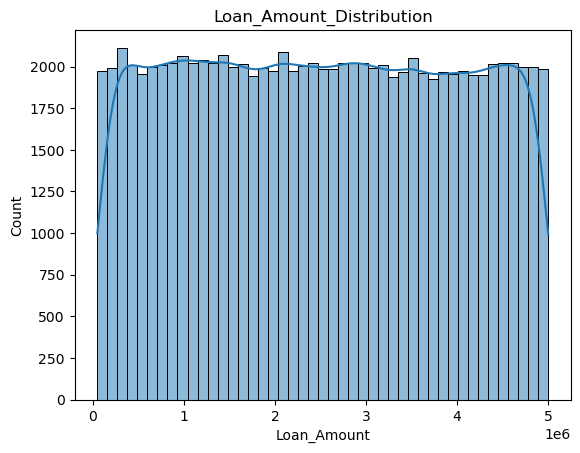

In [34]:
#loan Amount Distribution
sns.histplot(loans['Loan_Amount'], kde= True)
plt.title('Loan_Amount_Distribution')
plt.xlabel('Loan_Amount')
plt.ylabel('Count')
plt.show()


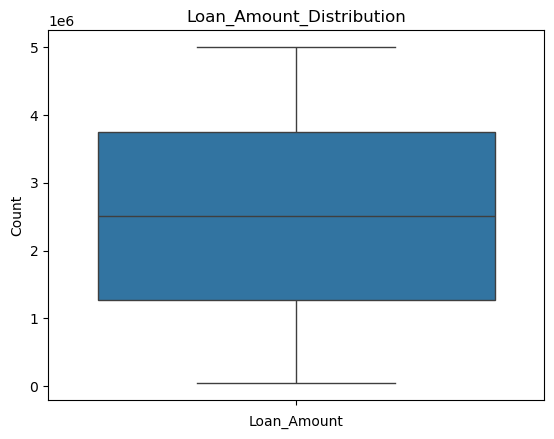

In [35]:
sns.boxplot(loans['Loan_Amount'])
plt.title('Loan_Amount_Distribution')
plt.xlabel('Loan_Amount')
plt.ylabel('Count')
plt.show()

## 📊 Descriptive Analysis

**EMI Amount Distribution**

This section shows the histogram and boxplot for EMI Amount

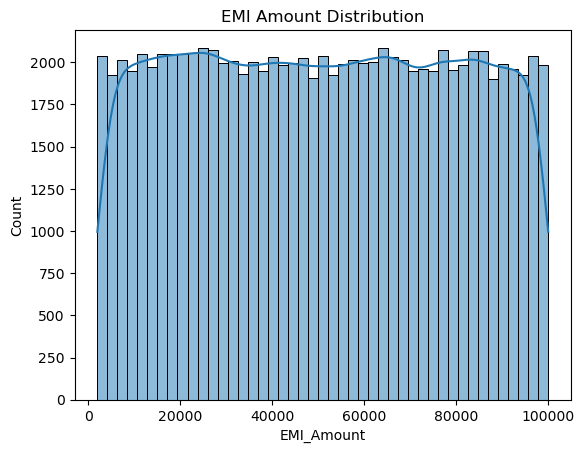

In [37]:
sns.histplot(loans['EMI_Amount'], kde=True)
plt.title("EMI Amount Distribution")
plt.xlabel("EMI_Amount")
plt.ylabel("Count")
plt.show()

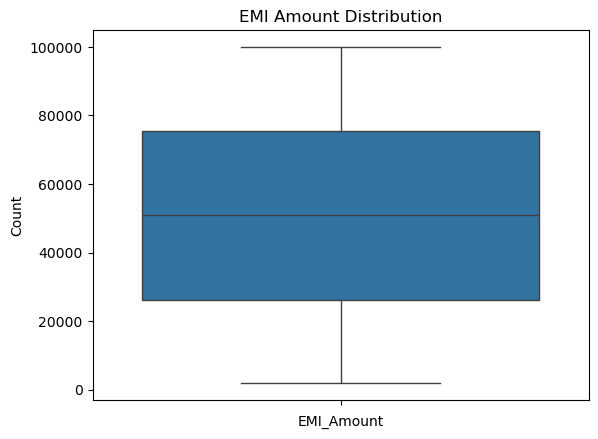

In [38]:
sns.boxplot(loans['EMI_Amount'])
plt.title("EMI Amount Distribution")
plt.xlabel("EMI_Amount")
plt.ylabel("Count")
plt.show()

## 📊 Descriptive Analysis

**Credit_Score Distribution**

This section shows the histogram and boxplot for Credit Score

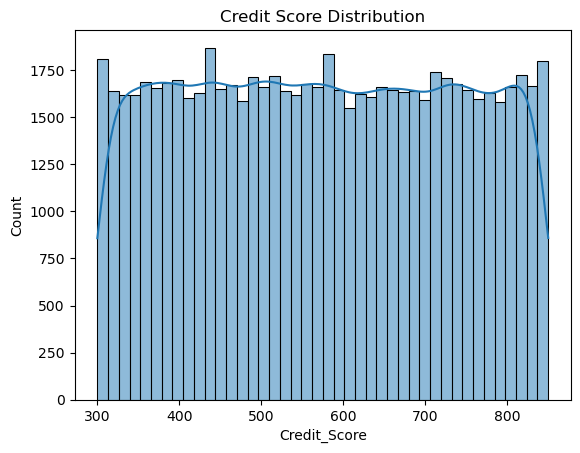

In [40]:
sns.histplot(customers["Credit_Score"], kde= True)
plt.title("Credit Score Distribution")
plt.xlabel("Credit_Score")
plt.ylabel("Count")
plt.show()

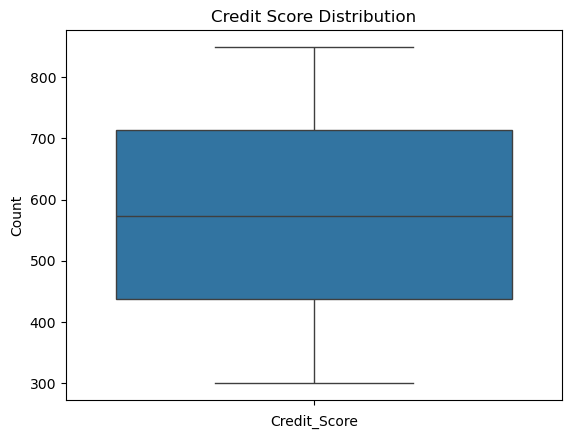

In [41]:
sns.boxplot(customers["Credit_Score"])
plt.title("Credit Score Distribution")
plt.xlabel("Credit_Score")
plt.ylabel("Count")
plt.show()

In [42]:
print(loans.columns)
print(branches.columns)
print(customers.columns)
print(applications.columns)
print(defaults.columns)
print(transactions.columns)



Index(['Loan_ID', 'Customer_ID', 'Loan_Amount', 'Interest_Rate', 'Loan_Term',
       'Disbursal_Date', 'Repayment_Start_Date', 'Repayment_End_Date',
       'Loan_Status', 'Overdue_Amount', 'EMI_Amount', 'Collateral_Details'],
      dtype='object')
Index(['Branch_ID', 'Branch_Name', 'Region', 'Total_Customers',
       'Total_Active_Loans', 'Delinquent_Loans', 'Loan_Disbursement_Amount',
       'Avg_Processing_Time', 'Relationship_Manager_Count'],
      dtype='object')
Index(['Customer_ID', 'Full_Name', 'Contact_Number', 'Email', 'Address', 'Age',
       'Gender', 'Marital_Status', 'Employment_Status', 'Annual_Income',
       'Credit_Score', 'Region', 'Account_Tenure', 'Relationship_Manager_ID'],
      dtype='object')
Index(['Application_ID', 'Loan_ID', 'Customer_ID', 'Application_Date',
       'Approval_Date', 'Loan_Purpose', 'Source_Channel', 'Processing_Fee',
       'Approval_Status', 'Rejection_Reason'],
      dtype='object')
Index(['Default_ID', 'Loan_ID', 'Customer_ID', 'Default_Da

In [43]:
# to get regional trend we have to merge loans and customers table on the basis of customer-id
# Step 1: merge customers' Region into loans
loan_data = loans.merge(customers[['Customer_ID', 'Region']], on='Customer_ID', how='left')

#analyze disbusement by region
region_disbursement = loan_data.groupby('Region')['Loan_Amount'].sum().reset_index()
region_disbursement.columns = ['Region', 'Total_Loan_Disbursed']
print(region_disbursement)



      Region  Total_Loan_Disbursed
0    Central           37243437019
1       East           38437798746
2      North           37963952967
3  Northeast           37477362151
4      South           37740573537
5       West           37600155243


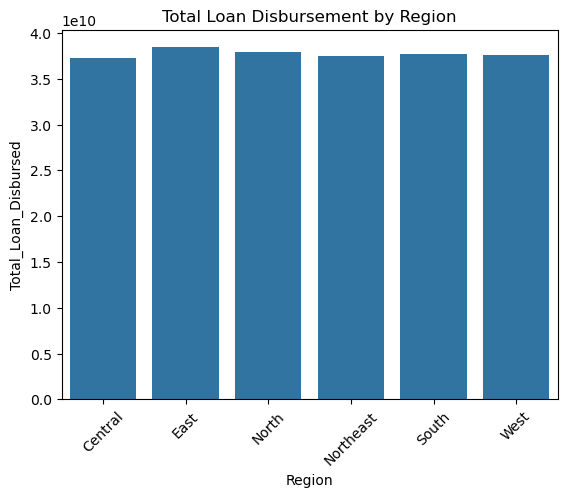

In [44]:
sns.barplot(x='Region', y='Total_Loan_Disbursed', data=region_disbursement)
plt.title('Total Loan Disbursement by Region')
plt.xticks(rotation=45)
plt.show()

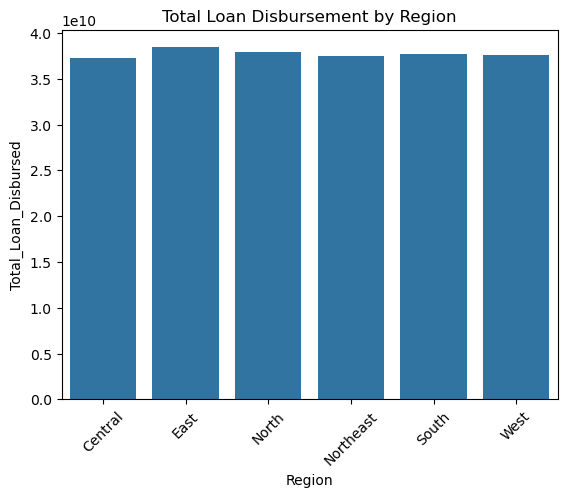

In [45]:
# Step 1: merge customers' Region into loans
loan_data = loans.merge(customers[['Customer_ID', 'Region']], on='Customer_ID', how='left')
region_disbursement = loan_data.groupby('Region')['Loan_Amount'].sum().reset_index()
region_disbursement.columns = ['Region', 'Total_Loan_Disbursed']   #renaming the column for readability
#Visulalization region wise
sns.barplot(x='Region', y='Total_Loan_Disbursed', data=region_disbursement)
plt.title('Total Loan Disbursement by Region')
plt.xticks(rotation=45)
#plt.ticklabel_format(style='plain', axis='y')
plt.show()




Part 2: Regional Default Trends
✅ What we need:
Default_Amount, Loan_ID, Customer_ID → from defaults

Customer_ID + Region → from customers

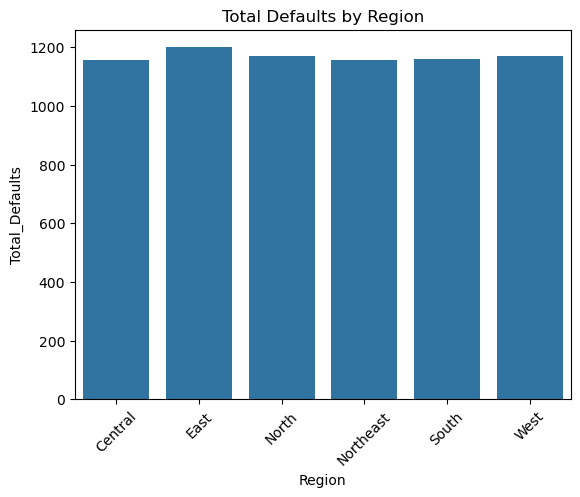

In [47]:
# Step 1: merge Region into defaults via customers
default_data = defaults.merge(customers[['Customer_ID', 'Region']], on='Customer_ID', how='left')
#📊 Analyze default count and amount by region
region_defaults = default_data.groupby('Region').agg(
    Total_Defaults=('Loan_ID', 'count'),
    Total_Default_Amount=('Default_Amount', 'sum')
).reset_index()
 #Visulatization
sns.barplot(x='Region', y='Total_Defaults', data=region_defaults)
plt.title('Total Defaults by Region')
plt.xticks(rotation=45)
plt.show()




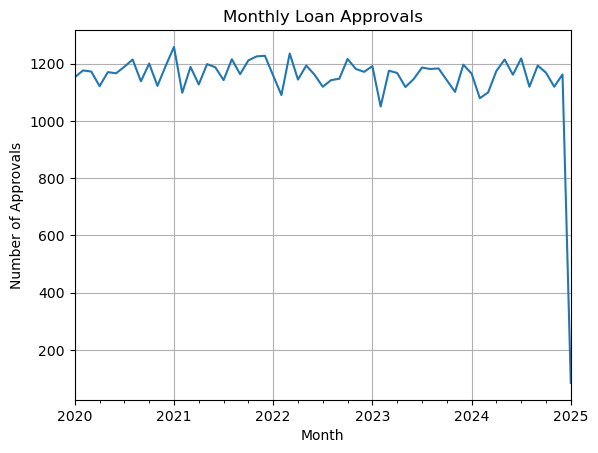

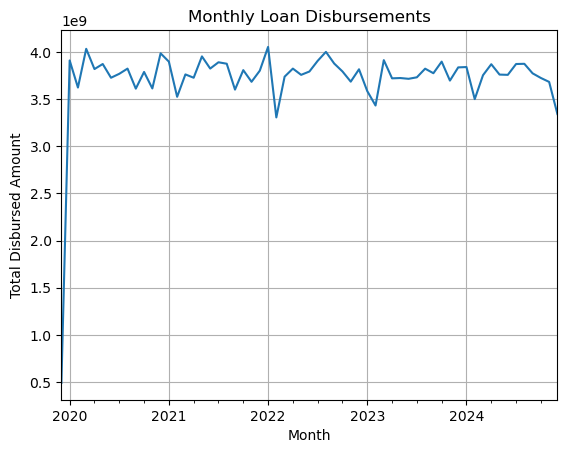

In [48]:
applications['Approval_Month'] = applications['Approval_Date'].dt.to_period('M')
loans['Disbursal_Month'] = loans['Disbursal_Date'].dt.to_period('M')

# Groups rows by each month
# .size() counts number of rows → i.e., number of approved applications per month
approval_trend = applications.groupby('Approval_Month').size()
disbursal_trend = loans.groupby('Disbursal_Month')['Loan_Amount'].sum()

# Plot 1: Approval Trend
approval_trend.plot(kind='line', title='Monthly Loan Approvals')
plt.xlabel('Month')
plt.ylabel('Number of Approvals')
plt.grid(True)
plt.show()  

# Plot 2: Disbursal Trend
disbursal_trend.plot(kind='line', title='Monthly Loan Disbursements')
plt.xlabel('Month')
plt.ylabel('Total Disbursed Amount')
plt.grid(True)
plt.show()

In [49]:
loans.head()

,Loan_ID,Customer_ID,Loan_Amount,Interest_Rate,Loan_Term,Disbursal_Date,Repayment_Start_Date,Repayment_End_Date,Loan_Status,Overdue_Amount,EMI_Amount,Collateral_Details,Disbursal_Month
0,L000001,C045929,4030468,8,24,2023-03-25,2023-04-25,2025-03-25,Active,0,18668,Property,2023-03
1,L000002,C038991,3498647,12,48,2023-10-23,2023-11-23,2027-10-23,Closed,44003,36012,Property,2023-10
2,L000003,C046662,4871438,10,24,2024-07-30,2024-08-30,2026-07-30,Overdue,0,26347,NaN,2024-07
3,L000004,C040268,541515,14,24,2024-11-22,2024-12-22,2026-11-22,Active,0,16106,NaN,2024-11
4,L000005,C067057,631036,10,36,2024-03-30,2024-04-30,2027-03-30,Overdue,0,10127,NaN,2024-03


In [50]:
defaults.head()

,Default_ID,Loan_ID,Customer_ID,Default_Date,Default_Amount,Default_Reason,Recovery_Status,Recovery_Amount,Legal_Action
0,D000001,L007312,C007312,2022-07-20,94480,Job Loss,Full,30360,Yes
1,D000002,L028234,C028234,2023-09-23,10912,Job Loss,Partial,0,Yes
2,D000003,L008319,C008319,2024-08-04,73711,Other,NaN,9866,Yes
3,D000004,L046668,C046668,2021-10-16,48955,Other,NaN,0,Yes
4,D000005,L082934,C082934,2024-10-07,56952,Medical Emergency,NaN,0,No


3. Default Risk Analysis
● Correlation Between Loan Attributes and Defaults:
o Calculate correlations between Loan_Amount, Interest_Rate,
Credit_Score, and Default_Flag (a binary indicator for default).

loans + customers + defaults
     ↓
merge and enrich data
     ↓
create Default_Flag = 1 if defaulted else 0
     ↓
correlate Loan_Amount, Interest_Rate, Credit_Score with Default_Flag

Correlation measures how strongly two variables move together.

Correlation Value	Meaning
+1	Strong positive relationship
0	No relationship
–1	Strong negative relationship

For example:

If Loan_Amount ↑ and Default_Flag also ↑ → strong positive correlation

If Credit_Score ↑ but Default_Flag ↓ → strong negative correlation (this makes sense!)

🔸 Why are we checking correlation?
To understand:

Do larger loans default more?

Do higher interest rates lead to more defaults?

Do low credit scores predict more defaults?

               Loan_Amount  Interest_Rate  Credit_Score  Default_Flag
Loan_Amount              1             -0             0            -0
Interest_Rate           -0              1             0            -0
Credit_Score             0              0             1            -0
Default_Flag            -0             -0            -0             1


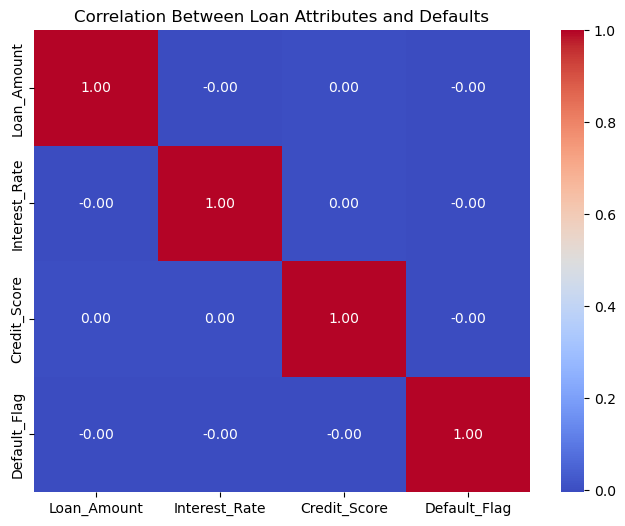

In [54]:
#Step 1: Merge all required data
#We need to combine data from:loans (Loan info),defaults (to flag defaults),customers (for credit score)
# 1: Merge defaults into loans (to flag which loans defaulted)
loan_default = loans.merge(defaults[['Loan_ID']], on='Loan_ID', how='left')

# 2: Create Default_Flag (1 if defaulted, 0 if not)
loan_default['Default_Flag'] = loan_default['Loan_ID'].isin(defaults['Loan_ID']).astype(int)

#  3: Merge customer info to bring in Credit Score
loan_default = loan_default.merge(customers[['Customer_ID', 'Credit_Score']], on='Customer_ID', how='left')

#Selecting relevant column for correlation 1. Loan_Amount 2. Interest_Rate 3.Credit_Score 4. Default_Flag
correlation_df = loan_default[['Loan_Amount', 'Interest_Rate', 'Credit_Score', 'Default_Flag']]

#calculate correlation matrix
correlation_matrix = correlation_df.corr()
print(correlation_matrix)

# Visualization (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,   # the data (e.g. correlation matrix)
    annot=True,           # show the values in each cell
    cmap='coolwarm',      # color palette for positive vs negative
    fmt=".2f"             # format float values to 2 decimal places
)
plt.title("Correlation Between Loan Attributes and Defaults")
plt.show()




Pairwise Correlation Analysis:
o Create a heatmap to visualize the correlations between key
variables, such as EMI_Amount, Overdue_Amount, and
Default_Amount

                EMI_Amount  Overdue_Amount  Default_Amount
EMI_Amount               1               0               0
Overdue_Amount           0               1              -0
Default_Amount           0              -0               1


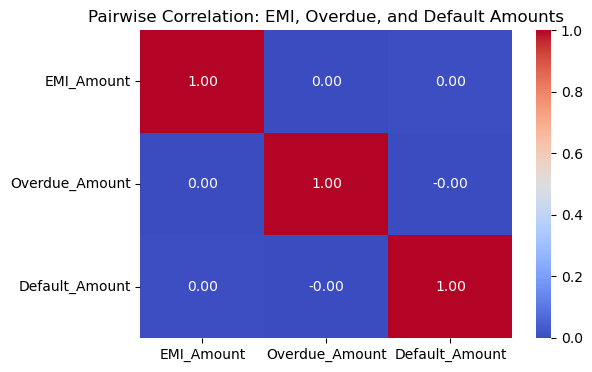

In [56]:
# Merge default data with loan data to bring in EMI and Overdue info
pair_data = loans.merge(defaults[['Loan_ID', 'Default_Amount']], on='Loan_ID', how='left')
#pair_data.head()
#pair_data.info()
# Replace NaN in Default_Amount with 0 (no default)
pair_data['Default_Amount'] = pair_data['Default_Amount'].fillna(0)


# Keep only the columns we're interested in
correlation_vars = pair_data[['EMI_Amount', 'Overdue_Amount', 'Default_Amount']]
#calculate correlation matrix
correlation_matrix = correlation_vars.corr()
print(correlation_matrix)

#visualization heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pairwise Correlation: EMI, Overdue, and Default Amounts")
plt.show()



4. Branch and Regional Performance
● Rank branches by:
o Loan disbursement volume.
o Processing time efficiency.
o Default rates and recovery rates.
● Compare branch performance across regions.


In [58]:
branches.head()

,Branch_ID,Branch_Name,Region,Total_Customers,Total_Active_Loans,Delinquent_Loans,Loan_Disbursement_Amount,Avg_Processing_Time,Relationship_Manager_Count
0,B001,"Dhar, Kant and Madan",West,2891,279,21,341680882,6,29
1,B002,Shan Group,East,4459,1201,149,96549019,8,35
2,B003,Sachdev-Banerjee,Central,2504,122,168,445787808,12,48
3,B004,Kapadia-Brar,East,1542,1422,96,353934299,9,50
4,B005,"Mangal, Kaur and Borde",South,945,1613,87,311637902,11,10


   Branch_ID                   Branch_Name  Loan_Disbursement_Amount  \
35      B036                     Kara-Bahl                 499562869   
13      B014           Bhatti, Rau and Sem                 482327541   
11      B012                      Kaul Inc                 465469874   
47      B048            Chawla-Subramanian                 464419943   
34      B035  Malhotra, Boase and Malhotra                 449109596   
42      B043                  Grover Group                 447832443   
2       B003              Sachdev-Banerjee                 445787808   
49      B050                     Sani-Kale                 442594434   
9       B010                      Arya Ltd                 435407779   
36      B037                      Yogi Ltd                 420746720   

    Disbursement_Rank  
35                  1  
13                  2  
11                  3  
47                  4  
34                  5  
42                  6  
2                   7  
49             

C:\Users\adars\AppData\Local\Temp\ipykernel_20596\2248749092.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loan_Disbursement_Amount', y='Branch_Name', data=top_branches, palette='Blues_d')


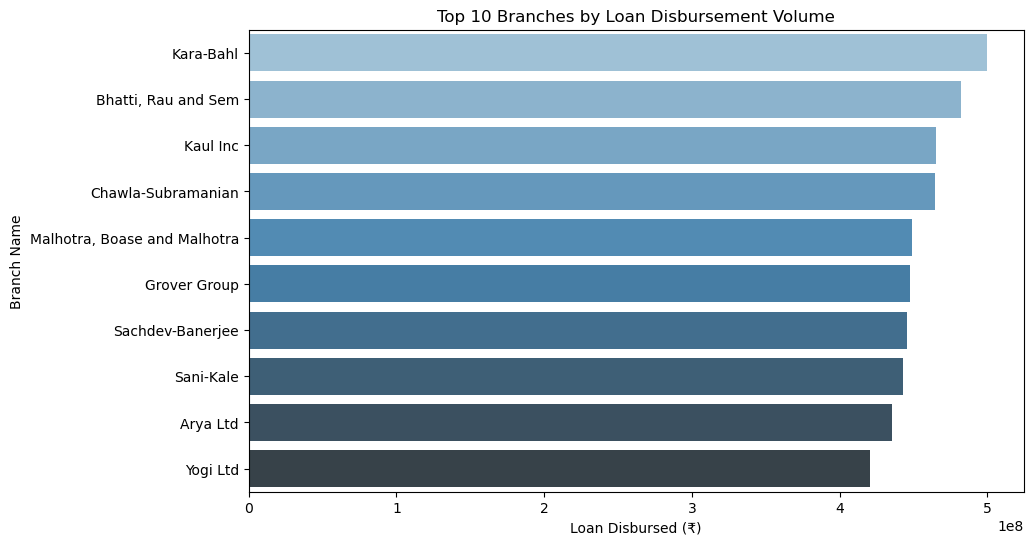

In [59]:
# Step 1: Select relevant columns
branch_disbursement = branches[['Branch_ID', 'Branch_Name', 'Loan_Disbursement_Amount']].copy()

# Step 2: Rank branches by disbursement amount (highest = rank 1)
branch_disbursement['Disbursement_Rank'] = branch_disbursement['Loan_Disbursement_Amount'].rank(ascending=False, method='min')

# Step 3: Sort by rank
branch_disbursement = branch_disbursement.sort_values('Disbursement_Rank')

# Step 4: View the top 10 performing branches
print(branch_disbursement.head(10))

#visualisation
top_branches = branch_disbursement.nsmallest(10, 'Disbursement_Rank')

plt.figure(figsize=(10, 6))
sns.barplot(x='Loan_Disbursement_Amount', y='Branch_Name', data=top_branches, palette='Blues_d')
plt.title('Top 10 Branches by Loan Disbursement Volume')
plt.xlabel('Loan Disbursed (₹)')
plt.ylabel('Branch Name')
plt.show()


   Branch_ID                 Branch_Name  Avg_Processing_Time  Efficiency_Rank
49      B050                   Sani-Kale                    1                1
46      B047               Chawla-Tandon                    2                2
41      B042                   Kar-Jaggi                    2                2
17      B018  Sandhu, Magar and Sachdeva                    2                2
44      B045                Solanki-Shah                    3                5
26      B027        Kapadia-Ramakrishnan                    3                5
11      B012                    Kaul Inc                    3                5
47      B048          Chawla-Subramanian                    4                8
32      B033        Saini, Iyer and Sani                    5                9
22      B023     Wable, Butala and Kakar                    5                9


C:\Users\adars\AppData\Local\Temp\ipykernel_20596\161559702.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Processing_Time', y='Branch_Name', data=top_fast_branches, palette='Greens_d')


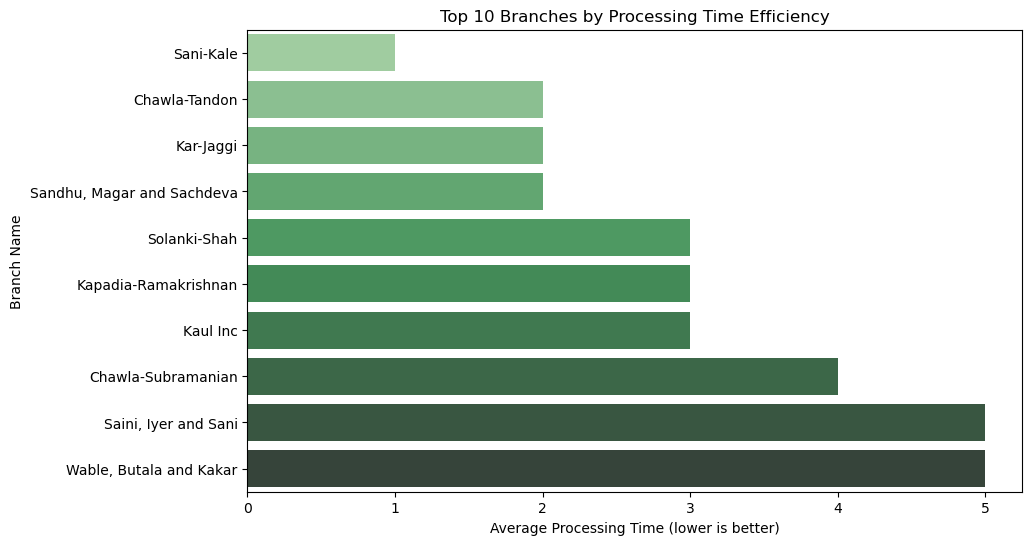

In [60]:
# Step 1: Select only necessary columns and make a copy
processing_rank = branches[['Branch_ID', 'Branch_Name', 'Avg_Processing_Time']].copy()

# Step 2: Rank by processing time (lower is better → ascending=True)
processing_rank['Efficiency_Rank'] = processing_rank['Avg_Processing_Time'].rank(ascending=True, method='min')

# Step 3: Sort to view fastest branches first
processing_rank = processing_rank.sort_values('Efficiency_Rank')

# Step 4: View top 10 efficient branches
print(processing_rank.head(10))

#visualization
top_fast_branches = processing_rank.nsmallest(10, 'Efficiency_Rank')

plt.figure(figsize=(10, 6))
sns.barplot(x='Avg_Processing_Time', y='Branch_Name', data=top_fast_branches, palette='Greens_d')
plt.title('Top 10 Branches by Processing Time Efficiency')
plt.xlabel('Average Processing Time (lower is better)')
plt.ylabel('Branch Name')
plt.show()

● Compare branch performance across regions.

      Region  Avg_Loan_Disbursement  Avg_Processing_Time  Default_Rate  \
5       West            331,804,774                    6             0   
0    Central            331,604,830                   10             0   
1       East            250,834,535                   10             0   
2      North            235,433,850                   10             0   
4      South            211,863,313                    9             0   
3  Northeast            110,706,961                    6             0   

   Recovery_Rate  
5              0  
0              0  
1              0  
2              0  
4              0  
3              0  


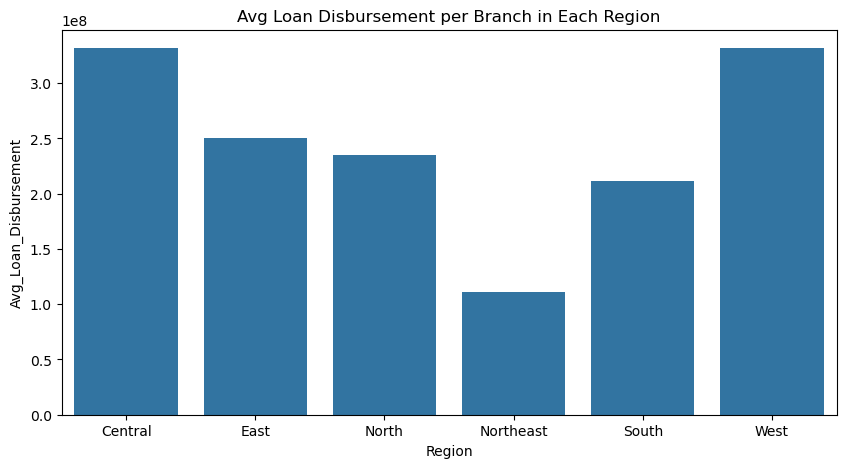

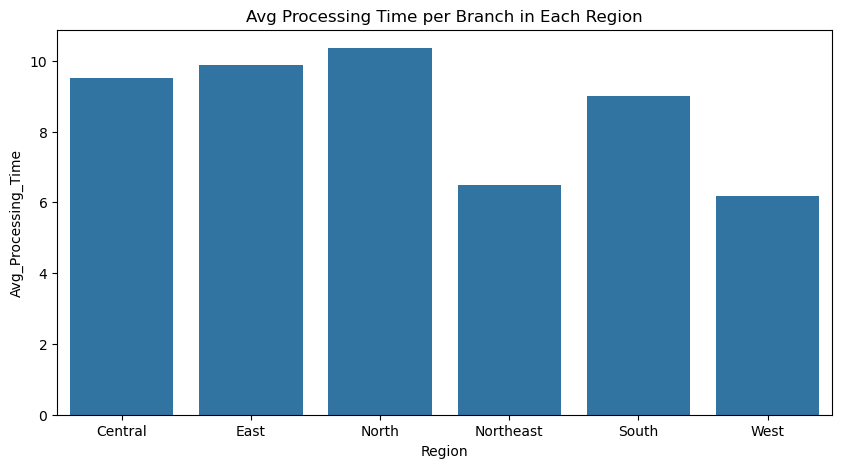

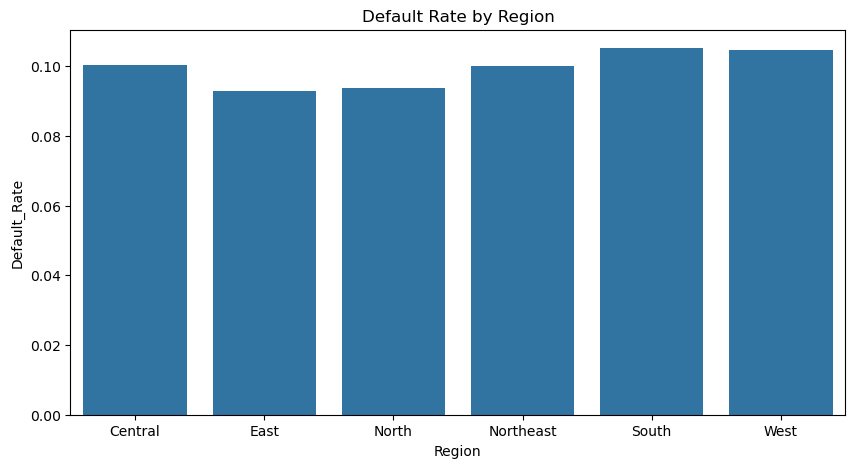

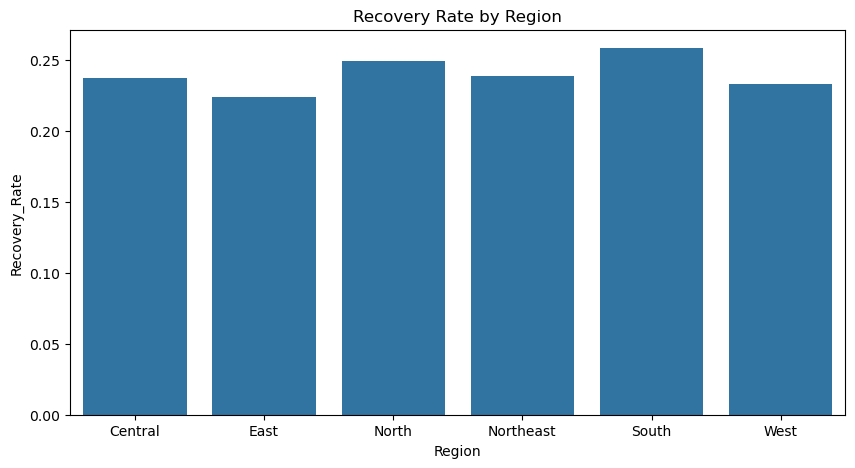

In [62]:
branch_perf = branches[['Branch_ID', 'Branch_Name', 'Region', 'Loan_Disbursement_Amount', 'Avg_Processing_Time']].copy()

loan_data = loans.merge(defaults[['Loan_ID']], on='Loan_ID', how='left')
loan_data['Default_Flag'] = loan_data['Loan_ID'].isin(defaults['Loan_ID']).astype(int)

#Bring Region info from customers

loan_data = loan_data.merge(customers[['Customer_ID', 'Region']], on='Customer_ID', how='left')


# region_defaults → Default_Rate
region_defaults = loan_data.groupby('Region').agg(
    Total_Loans=('Loan_ID', 'count'),
    Defaults=('Default_Flag', 'sum')
).reset_index()

region_defaults['Default_Rate'] = region_defaults['Defaults'] / region_defaults['Total_Loans']

# region_recovery → Recovery_Rate
default_data = defaults.merge(customers[['Customer_ID', 'Region']], on='Customer_ID', how='left')

region_recovery = default_data.groupby('Region').agg(
    Total_Default_Amount=('Default_Amount', 'sum'),
    Total_Recovery_Amount=('Recovery_Amount', 'sum')
).reset_index()

region_recovery['Recovery_Rate'] = region_recovery['Total_Recovery_Amount'] / region_recovery['Total_Default_Amount']


region_risk = region_defaults.merge(region_recovery, on='Region', how='outer')

#3: Aggregate branch metrics region-wise
region_summary = branch_perf.groupby('Region').agg(
    Avg_Loan_Disbursement=('Loan_Disbursement_Amount', 'mean'),
    Avg_Processing_Time=('Avg_Processing_Time', 'mean')
).reset_index()

#4: Merge all region-wise metrics
region_comparison = region_summary.merge(region_risk[['Region', 'Default_Rate', 'Recovery_Rate']], on='Region', how='left')
#5: View Region-wise Comparison
print(region_comparison.sort_values('Avg_Loan_Disbursement', ascending=False))

#visualization
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Avg_Loan_Disbursement', data=region_comparison)
plt.title('Avg Loan Disbursement per Branch in Each Region')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Avg_Processing_Time', data=region_comparison)
plt.title('Avg Processing Time per Branch in Each Region')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Default_Rate', data=region_comparison)
plt.title('Default Rate by Region')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Recovery_Rate', data=region_comparison)
plt.title('Recovery Rate by Region')
plt.show()



5. Customer Segmentation
● Segment customers by income, credit score, and loan status.
● Identify high-risk and high-value customer groups.
● Analyze repayment behavior across segments.

C:\Users\adars\AppData\Local\Temp\ipykernel_20596\4069480233.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  repayment_summary = loan_data.groupby(['Income_Segment', 'Credit_Score_Segment']).agg(


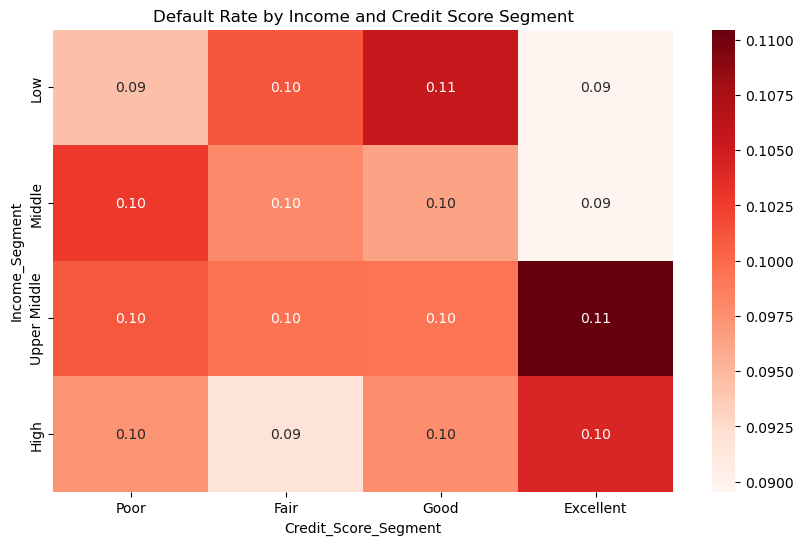

<Figure size 640x480 with 0 Axes>

In [244]:
# Step 1: Add Default_Flag to loans
loan_data = loans.merge(defaults[['Loan_ID']], on='Loan_ID', how='left')
loan_data['Default_Flag'] = loan_data['Loan_ID'].isin(defaults['Loan_ID']).astype(int)

# Step 2: Merge customer info
loan_data = loan_data.merge(customers[['Customer_ID', 'Annual_Income', 'Credit_Score']], on='Customer_ID', how='left')

#step 3
# Income Segments
loan_data['Income_Segment'] = pd.cut(loan_data['Annual_Income'],
                                     bins=[0, 300000, 700000, 1500000, float('inf')],
                                     labels=['Low', 'Middle', 'Upper Middle', 'High'])

# Credit Score Segments
loan_data['Credit_Score_Segment'] = pd.cut(loan_data['Credit_Score'],
                                           bins=[0, 600, 700, 800, 900],
                                           labels=['Poor', 'Fair', 'Good', 'Excellent'])

#Loan Status Segments
loan_data['Loan_Status'] = loan_data['Loan_Status'].fillna('Unknown')

#step 4 Identify high-risk and high-value segments
# High Risk = Poor credit or defaulted
high_risk = loan_data[(loan_data['Credit_Score_Segment'] == 'Poor') |(loan_data['Default_Flag'] == 1)]

# High Value = High income and Excellent credit, no default
high_value = loan_data[(loan_data['Income_Segment'] == 'High') & (loan_data['Credit_Score_Segment'] == 'Excellent') & (loan_data['Default_Flag'] == 0)]

# Step 5: Analyze repayment behavior
# Aggregate repayment behavior by segment
repayment_summary = loan_data.groupby(['Income_Segment', 'Credit_Score_Segment']).agg(
    Total_Customers=('Customer_ID', 'nunique'),
    Avg_Overdue_Amount=('Overdue_Amount', 'mean'),
    Default_Rate=('Default_Flag', 'mean')
).reset_index()

#visulaization
plt.figure(figsize=(10, 6))


heatmap_data = repayment_summary.pivot(
    index='Income_Segment',
    columns='Credit_Score_Segment',
    values='Default_Rate'
)

sns.heatmap(heatmap_data, annot=True, cmap='Reds', fmt=".2f")
plt.title("Default Rate by Income and Credit Score Segment")
plt.show()








6. Advanced Statistical Analysis

Branch-Level Correlation:
o Explore the relationship between branch performance metrics
(Delinquent_Loans, Loan_Disbursement_Amount, Recovery_Rate)
and overall efficiency

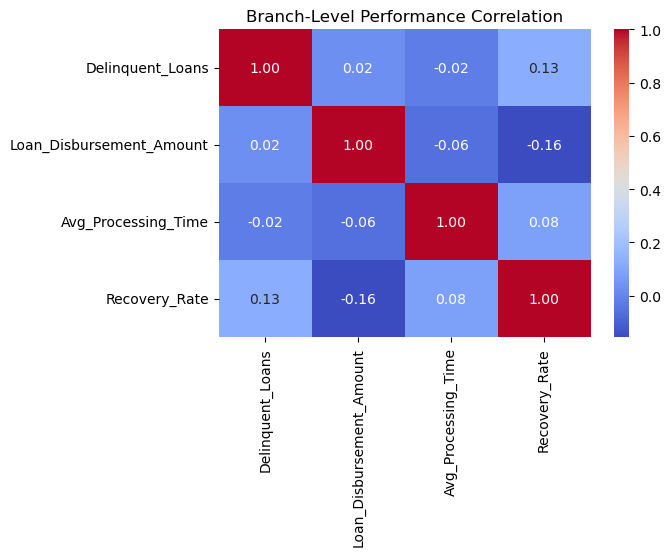

In [66]:
branch_perf = branches[['Branch_ID', 'Region', 'Delinquent_Loans', 'Loan_Disbursement_Amount', 'Avg_Processing_Time']].copy()
branch_perf = branch_perf.merge(region_recovery[['Region', 'Recovery_Rate']], on='Region', how='left')

branch_corr = branch_perf[['Delinquent_Loans', 'Loan_Disbursement_Amount', 'Avg_Processing_Time', 'Recovery_Rate']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(branch_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Branch-Level Performance Correlation")
plt.show()


7. Transaction and Recovery Analysis
● Analyze penalty payments and overdue trends.
● Evaluate recovery rates by Default_Reason and Legal_Action.
● Compare recovery rates across regions and branches.

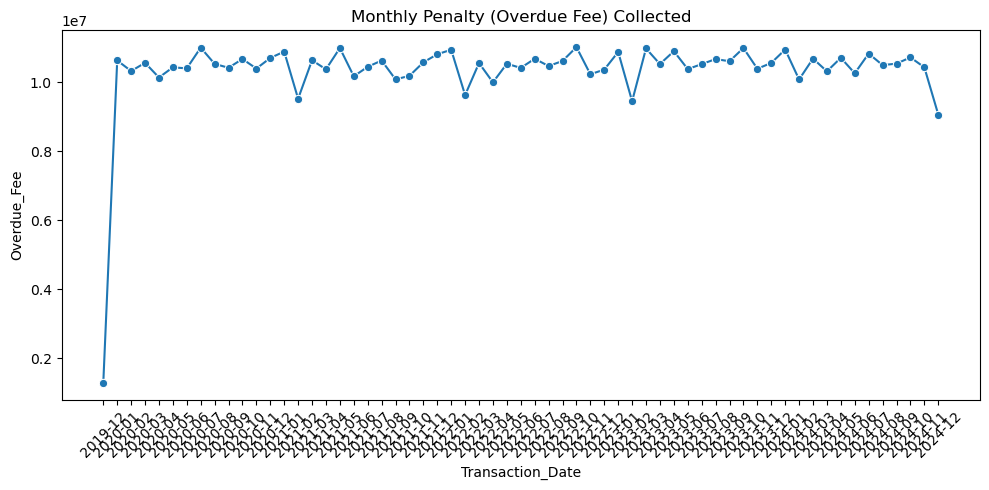

In [68]:
#penalty trend over time
transactions['Transaction_Date'] = pd.to_datetime(transactions['Transaction_Date'])

penalty_trend = transactions.groupby(transactions['Transaction_Date'].dt.to_period('M'))['Overdue_Fee'].sum().reset_index()
penalty_trend['Transaction_Date'] = penalty_trend['Transaction_Date'].astype(str)

plt.figure(figsize=(10, 5))
sns.lineplot(x='Transaction_Date', y='Overdue_Fee', data=penalty_trend, marker='o')
plt.title("Monthly Penalty (Overdue Fee) Collected")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


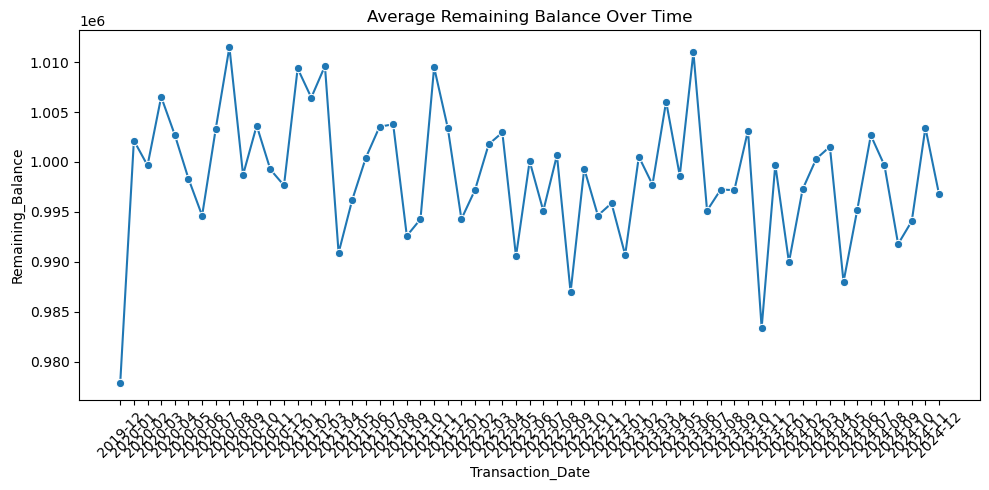

In [69]:
#Average Overdue Amount Trend

overdue_trend = transactions.groupby(transactions['Transaction_Date'].dt.to_period('M'))['Remaining_Balance'].mean().reset_index()
overdue_trend['Transaction_Date'] = overdue_trend['Transaction_Date'].astype(str)

plt.figure(figsize=(10, 5))
sns.lineplot(x='Transaction_Date', y='Remaining_Balance', data=overdue_trend, marker='o')
plt.title("Average Remaining Balance Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#2: Recovery by Default Reason & Legal Action
🔹 Data: defaults table
Key columns: Default_Reason, Legal_Action, Recovery_Amount, Default_Amount

C:\Users\adars\AppData\Local\Temp\ipykernel_20596\1056961036.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recovery_Rate', y='Default_Reason', data=default_reason_recovery, palette='Blues_d')


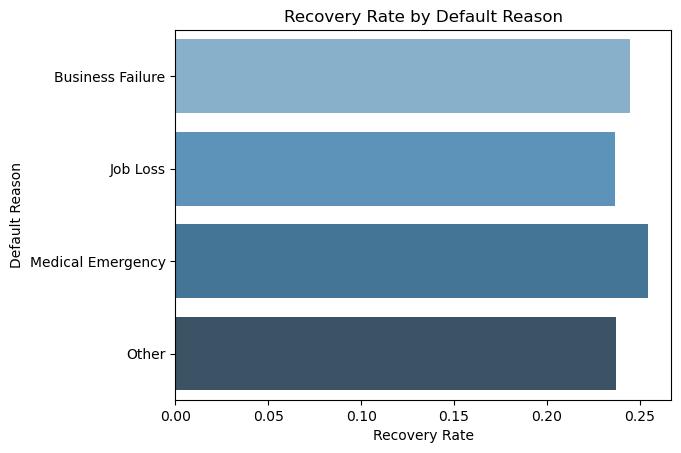

In [71]:
default_reason_recovery = defaults.groupby('Default_Reason').agg(
    Total_Default=('Default_Amount', 'sum'),
    Total_Recovery=('Recovery_Amount', 'sum')
).reset_index()

default_reason_recovery['Recovery_Rate'] = default_reason_recovery['Total_Recovery'] / default_reason_recovery['Total_Default']

sns.barplot(x='Recovery_Rate', y='Default_Reason', data=default_reason_recovery, palette='Blues_d')
plt.title("Recovery Rate by Default Reason")
plt.xlabel("Recovery Rate")
plt.ylabel("Default Reason")
plt.show()


C:\Users\adars\AppData\Local\Temp\ipykernel_20596\4224751607.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recovery_Rate', y='Legal_Action', data=legal_action_recovery, palette='Greens_d')


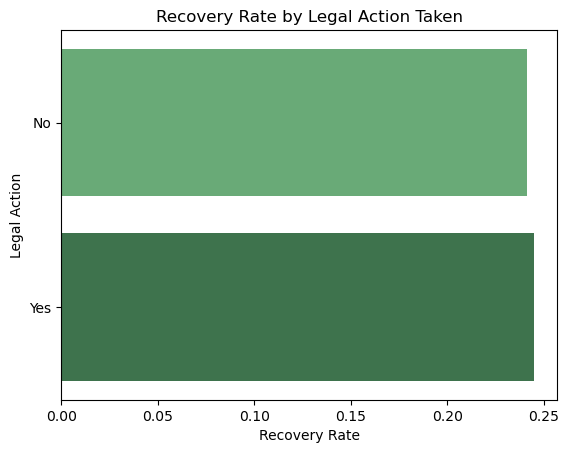

In [72]:
# Recovery Rate by Legal Action
legal_action_recovery = defaults.groupby('Legal_Action').agg(
    Total_Default=('Default_Amount', 'sum'),
    Total_Recovery=('Recovery_Amount', 'sum')
).reset_index()

legal_action_recovery['Recovery_Rate'] = legal_action_recovery['Total_Recovery'] / legal_action_recovery['Total_Default']

sns.barplot(x='Recovery_Rate', y='Legal_Action', data=legal_action_recovery, palette='Greens_d')
plt.title("Recovery Rate by Legal Action Taken")
plt.xlabel("Recovery Rate")
plt.ylabel("Legal Action")
plt.show()


C:\Users\adars\AppData\Local\Temp\ipykernel_20596\2677080113.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Recovery_Rate', data=region_recovery_summary, palette='Purples_d')


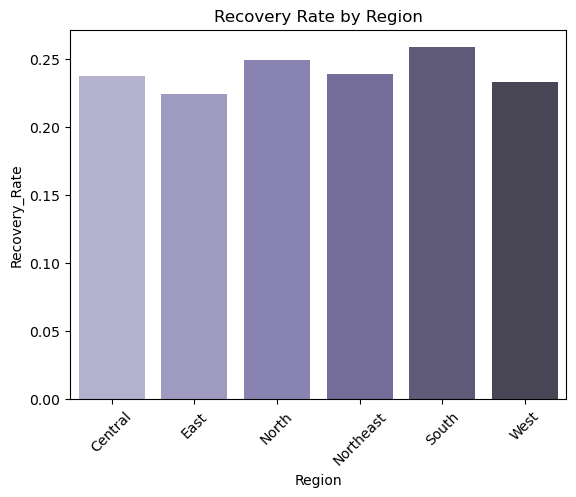

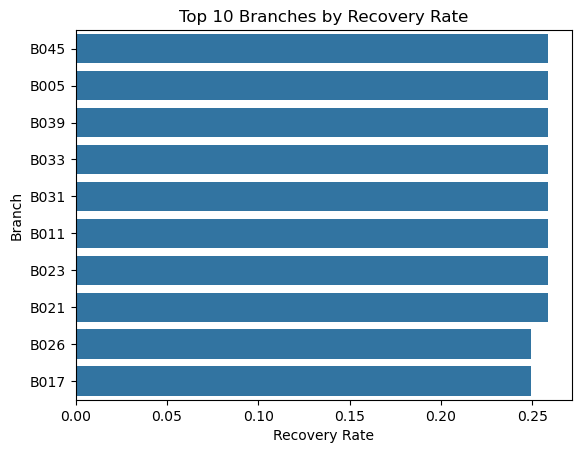

In [73]:
#Recovery Comparison Across Regions & Branches
region_recovery = defaults.merge(customers[['Customer_ID', 'Region']], on='Customer_ID', how='left')

region_recovery_summary = region_recovery.groupby('Region').agg(
    Total_Default=('Default_Amount', 'sum'),
    Total_Recovery=('Recovery_Amount', 'sum')
).reset_index()

region_recovery_summary['Recovery_Rate'] = region_recovery_summary['Total_Recovery'] / region_recovery_summary['Total_Default']

sns.barplot(x='Region', y='Recovery_Rate', data=region_recovery_summary, palette='Purples_d')
plt.title("Recovery Rate by Region")
plt.xticks(rotation=45)
plt.show()

#recovery by branch

branch_recovery = defaults.merge(customers[['Customer_ID', 'Region']], on='Customer_ID', how='left')
branch_recovery = branch_recovery.merge(branches[['Region', 'Branch_ID']], on='Region', how='left')

branch_summary = branch_recovery.groupby('Branch_ID').agg(
    Total_Default=('Default_Amount', 'sum'),
    Total_Recovery=('Recovery_Amount', 'sum')
).reset_index()

branch_summary['Recovery_Rate'] = branch_summary['Total_Recovery'] / branch_summary['Total_Default']

branch_summary = branch_summary.dropna()

sns.barplot(x='Recovery_Rate', y='Branch_ID', data=branch_summary.sort_values('Recovery_Rate', ascending=False).head(10))
plt.title("Top 10 Branches by Recovery Rate")
plt.xlabel("Recovery Rate")
plt.ylabel("Branch")
plt.show()


C:\Users\adars\AppData\Local\Temp\ipykernel_20596\383173640.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emi_default = loan_data.groupby('EMI_Bin').agg(


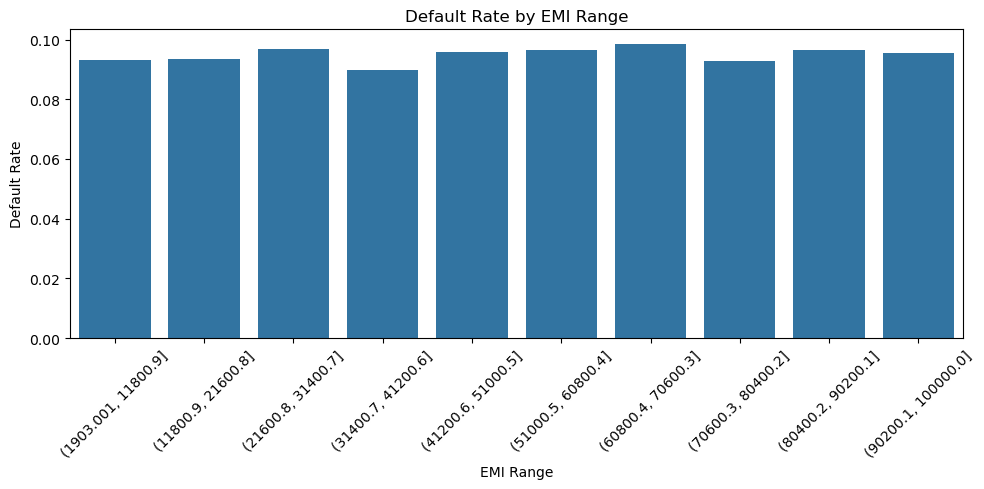

In [74]:
loan_data = loans.copy()
loan_data['Default_Flag'] = loan_data['Loan_ID'].isin(defaults['Loan_ID']).astype(int)
# EMI vs Default Probability (Binned)
loan_data['EMI_Bin'] = pd.cut(loan_data['EMI_Amount'], bins=10)  
# AuCalculate default rate per EMI bintomatically 6 bins
emi_default = loan_data.groupby('EMI_Bin').agg(
    Total=('Loan_ID', 'count'),
    Defaults=('Default_Flag', 'sum')
).reset_index()

emi_default['Default_Rate'] = emi_default['Defaults'] / emi_default['Total']

plt.figure(figsize=(10, 5))
sns.barplot(x='EMI_Bin', y='Default_Rate', data=emi_default)
plt.title('Default Rate by EMI Range')
plt.ylabel('Default Rate')
plt.xlabel('EMI Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




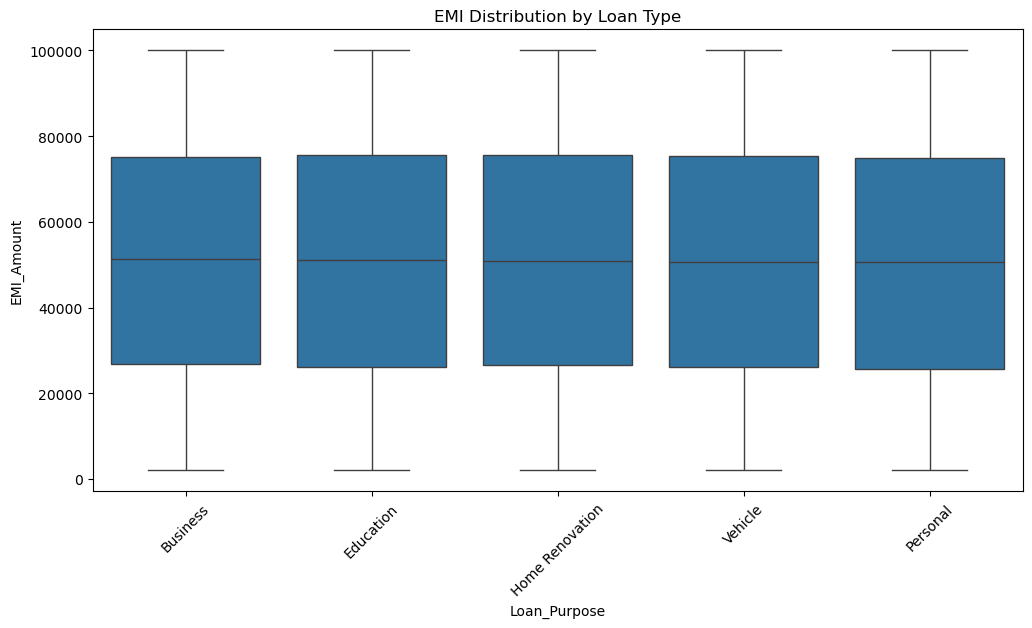

In [75]:
loan_apps = loans.merge(applications[['Loan_ID', 'Loan_Purpose']], on='Loan_ID', how='left')

#EMI distribution per loan type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Loan_Purpose', y='EMI_Amount', data=loan_apps)
plt.title('EMI Distribution by Loan Type')
plt.xticks(rotation=45)
plt.show()



9. Loan Application Insights
● Calculate approval and rejection rates for loan applications.
● Identify the most common reasons for loan rejection.
● Compare application processing fees between approved and rejected
applications.

Approval & Rejection Rates (%):
Approval_Status
Approved   85
Rejected   15
Name: proportion, dtype: float64


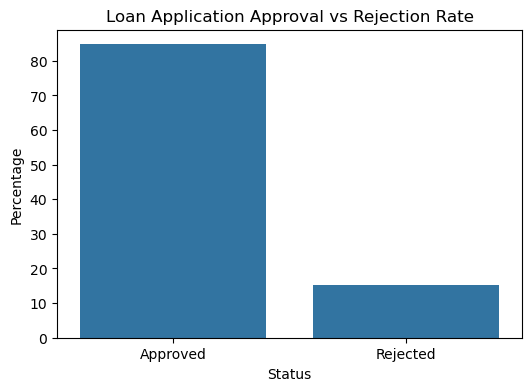

In [77]:
# Count approval status
status_counts = applications['Approval_Status'].value_counts(normalize=True) * 100
print("Approval & Rejection Rates (%):")
print(status_counts)

# Visualization

plt.figure(figsize=(6, 4))
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title("Loan Application Approval vs Rejection Rate")
plt.ylabel("Percentage")
plt.xlabel("Status")
plt.show()


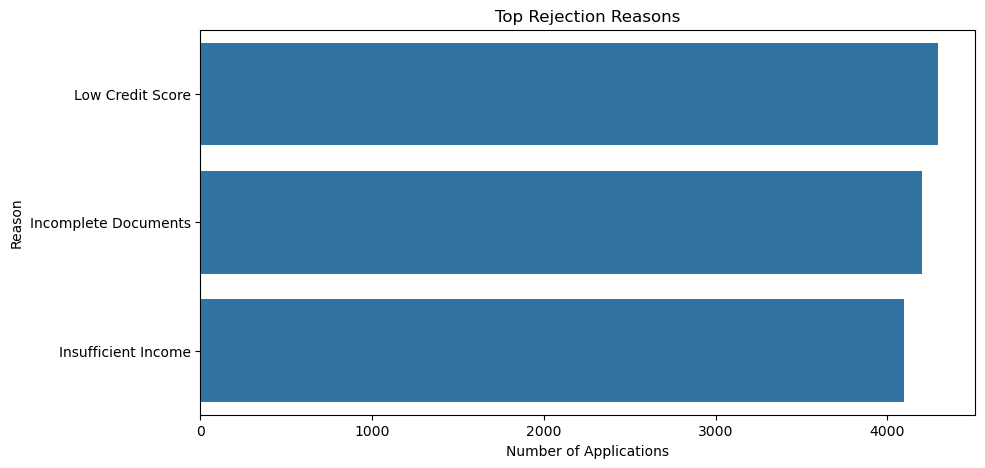

In [78]:
#Most Common Rejection Reason
rejection_reasons = applications['Rejection_Reason'].value_counts().reset_index()
rejection_reasons.columns = ['Rejection_Reason', 'Count']

# Top 10 reasons
top_reasons = rejection_reasons.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Rejection_Reason', data=top_reasons)
plt.title("Top Rejection Reasons")
plt.xlabel("Number of Applications")
plt.ylabel("Reason")
plt.show()


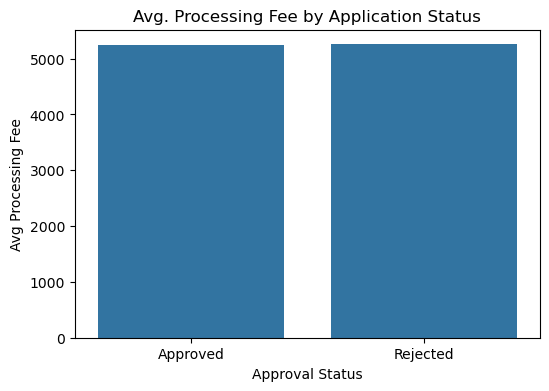

  Approval_Status  Processing_Fee
0        Approved           5,252
1        Rejected           5,255


In [79]:
#Compare application processing fees between approved and rejected applications.
fee_comparison = applications.groupby('Approval_Status')['Processing_Fee'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='Approval_Status', y='Processing_Fee', data=fee_comparison)
plt.title("Avg. Processing Fee by Application Status")
plt.xlabel("Approval Status")
plt.ylabel("Avg Processing Fee")
plt.show()

print(fee_comparison)


10. Recovery Effectiveness
● Determine the effectiveness of recovery efforts by calculating the ratio of
Recovery_Amount to Default_Amount.
● Compare recovery rates for defaults with and without legal actions.
● Analyze branch-wise recovery performance.

🔁 Overall Recovery Effectiveness: 24.31%
  Legal_Action  Total_Default  Total_Recovery  Recovery_Rate  \
0           No      242087969        58458449              0   
1          Yes      234719788        57461364              0   

   Recovery_Rate (%)  
0                 24  
1                 24  


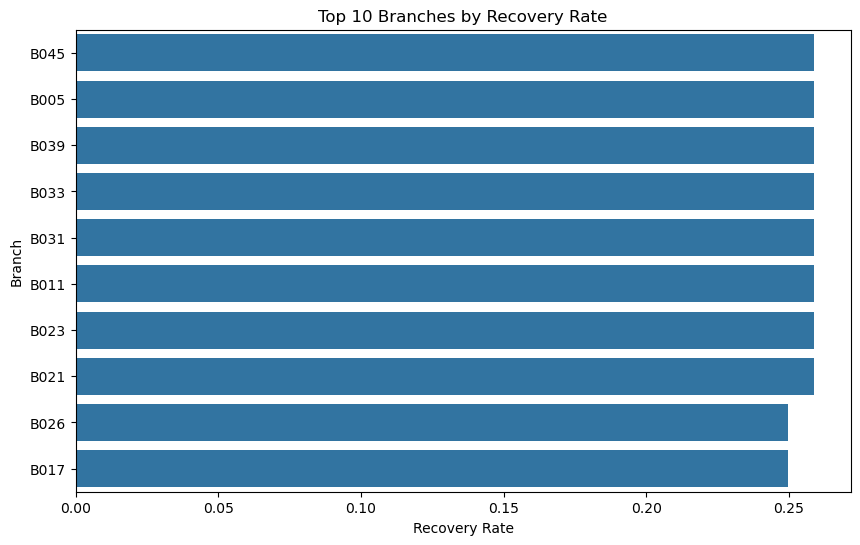

In [171]:

total_default = defaults['Default_Amount'].sum()
total_recovery = defaults['Recovery_Amount'].sum()
# Total recovery effectiveness
recovery_effectiveness = total_recovery / total_default
print(f"🔁 Overall Recovery Effectiveness: {recovery_effectiveness:.2%}")
#comparison with legal action & without legal action
legal_comparison = defaults.groupby('Legal_Action').agg(
    Total_Default=('Default_Amount', 'sum'),
    Total_Recovery=('Recovery_Amount', 'sum')
).reset_index()

# Fix integer division
legal_comparison['Recovery_Rate'] = legal_comparison['Total_Recovery'] / legal_comparison['Total_Default'].astype(float)

# Optional: Display as %
legal_comparison['Recovery_Rate (%)'] = (legal_comparison['Recovery_Rate'] * 100).round(2)

print(legal_comparison)

#Brach wise Recovvery summary
# Merge with customer to get region
branch_recovery = defaults.merge(customers[['Customer_ID', 'Region']], on='Customer_ID', how='left')

# Map Region to Branch_ID
branch_recovery = branch_recovery.merge(branches[['Region', 'Branch_ID']], on='Region', how='left')

#Group by Branch and calculate recovery rate
branch_summary = branch_recovery.groupby('Branch_ID').agg(
    Total_Default=('Default_Amount', 'sum'),
    Total_Recovery=('Recovery_Amount', 'sum')
).reset_index()

branch_summary['Recovery_Rate'] = branch_summary['Total_Recovery'] / branch_summary['Total_Default']
#Visulization
top_branches = branch_summary.sort_values('Recovery_Rate', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Recovery_Rate', y='Branch_ID', data=top_branches)
plt.title("Top 10 Branches by Recovery Rate")
plt.xlabel("Recovery Rate")
plt.ylabel("Branch")
plt.show()






11. Loan Disbursement Efficiency
● Analyze the time from application to loan disbursement and identify
bottlenecks.
● Compare average processing times across branches.
● Evaluate disbursement trends by loan purpose and region

📌 Average Disbursement Delay: 172.19 days
⚠️ Loans delayed beyond average: 34972


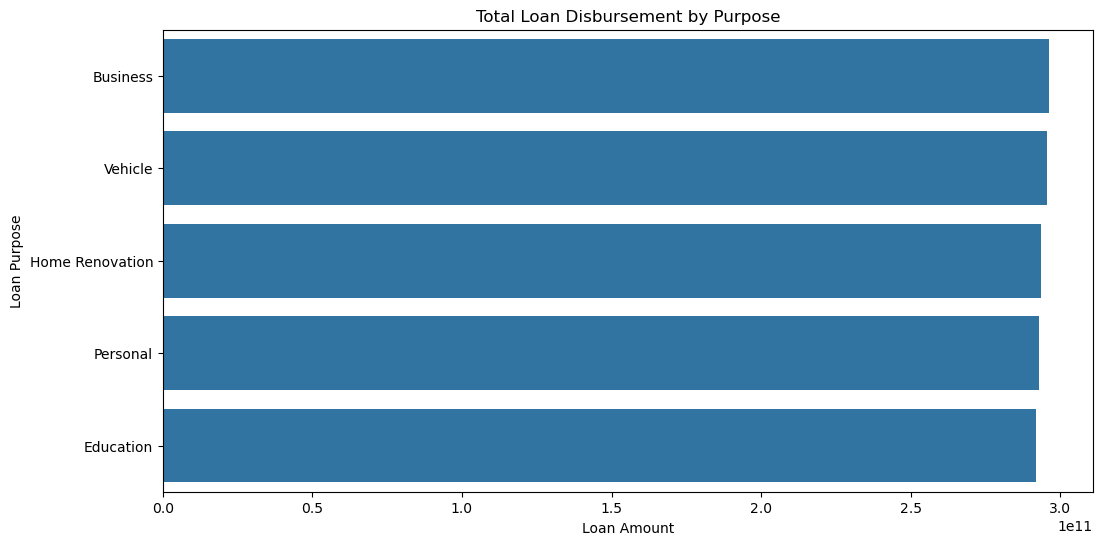

      Region   Loan_Amount
2      North  531495341538
0    Central  372434370190
1       East  307502389968
4      South  301924588296
5       West  225600931458
3  Northeast  149909448604


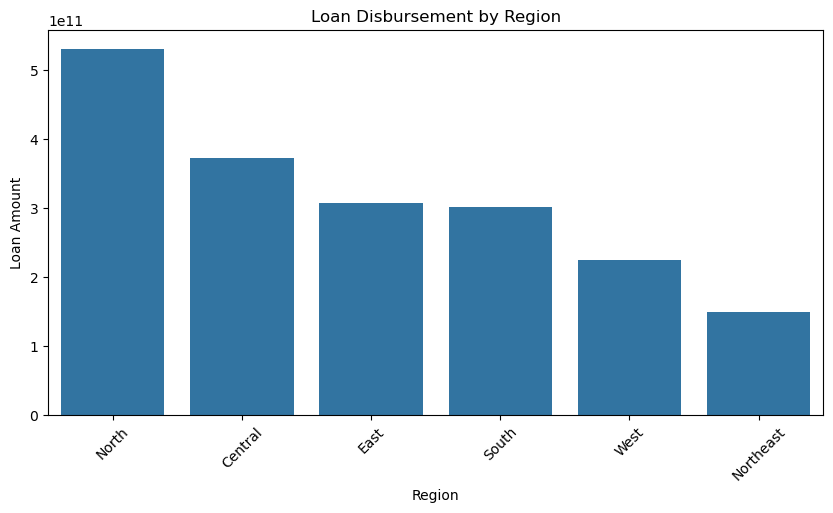

In [237]:
# Convert to datetime
applications['Application_Date'] = pd.to_datetime(applications['Application_Date'])
loans['Disbursal_Date'] = pd.to_datetime(loans['Disbursal_Date'])

# Merge loans with applications
loan_app = loans.merge(applications[['Loan_ID', 'Application_Date']], on='Loan_ID', how='left')

# Calculate delay in days
loan_app['Disbursement_Delay'] = (loan_app['Disbursal_Date'] - loan_app['Application_Date']).dt.days

#identify bottleneck ( condition delay > avg_delay)
avg_delay = loan_app['Disbursement_Delay'].mean()
delayed_loans = loan_app[loan_app['Disbursement_Delay'] > avg_delay]

print(f"📌 Average Disbursement Delay: {avg_delay:.2f} days")
print(f"⚠️ Loans delayed beyond average: {len(delayed_loans)}")

#compare average processing time by branch
# Merge customer region
loan_branch = loan_app.merge(customers[['Customer_ID', 'Region']], on='Customer_ID', how='left')

# Map Region to Branch_ID
loan_branch = loan_branch.merge(branches[['Region', 'Branch_ID']], on='Region', how='left')

# Average delay per branch
branch_delay = loan_branch.groupby('Branch_ID')['Disbursement_Delay'].mean().reset_index().sort_values('Disbursement_Delay')


#Disbursement Trends by Loan Purpose & Region# Add Loan Purpose from applications
loan_full = loan_branch.merge(applications[['Loan_ID', 'Loan_Purpose']], on='Loan_ID', how='left')

# Group by Loan Purpose
purpose_disbursement = loan_full.groupby('Loan_Purpose')['Loan_Amount'].sum().reset_index().sort_values('Loan_Amount', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Loan_Amount', y='Loan_Purpose', data=purpose_disbursement)
plt.title('Total Loan Disbursement by Purpose')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Purpose')
plt.show()

# Group by Region
region_disbursement = loan_full.groupby('Region')['Loan_Amount'].sum().reset_index().sort_values('Loan_Amount', ascending=False)
#print(region_disbursement)

plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Loan_Amount', data=region_disbursement)
plt.title('Loan Disbursement by Region')
plt.xlabel('Region')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()






12. Profitability Analysis
● Calculate the total interest income generated across all loans.
● Identify the most profitable loan purposes based on interest earnings.
● Compare profitability metrics for branches across regions.


💰 Total Interest Income: ₹75,037,526,934.92


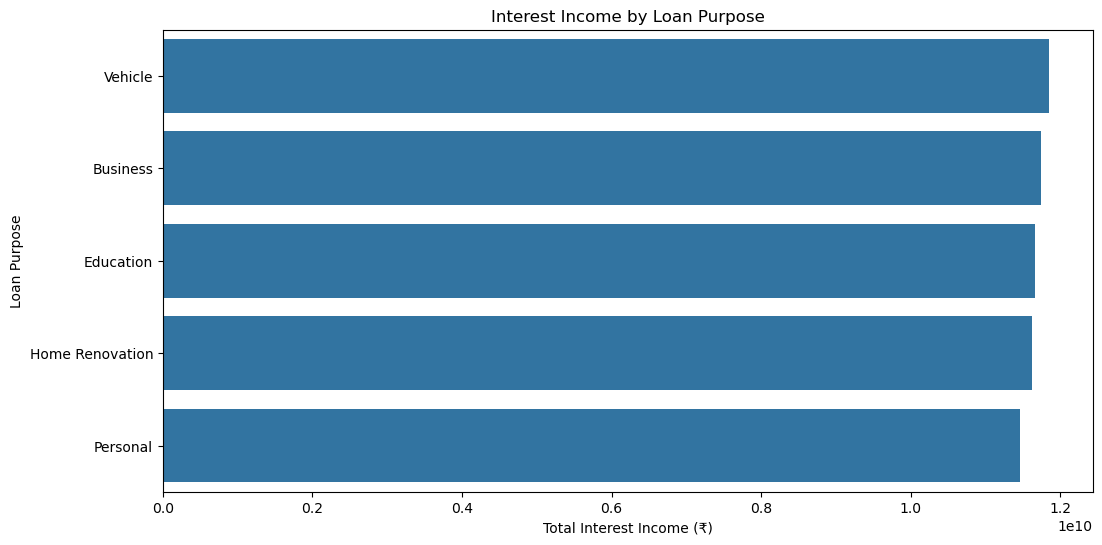

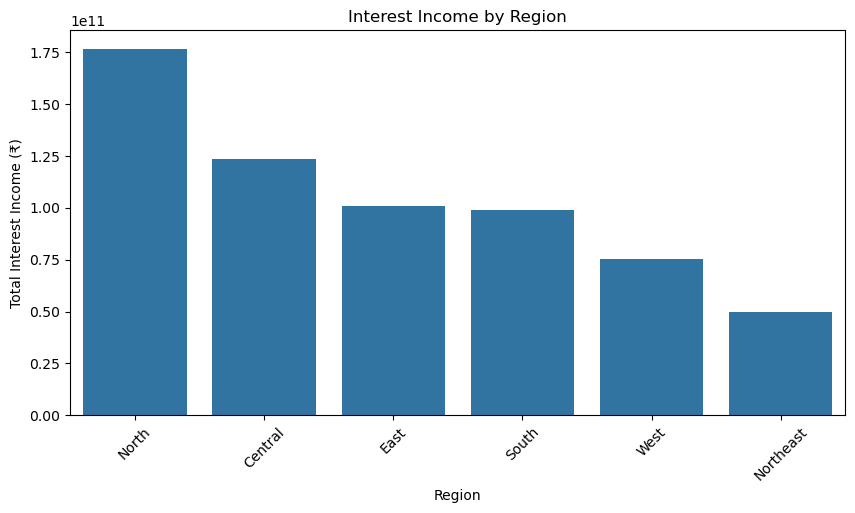

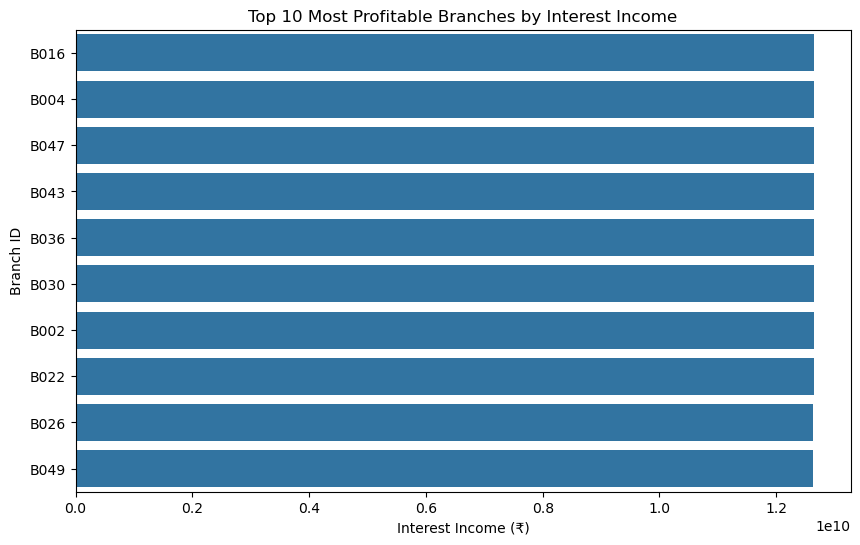

In [203]:
# Interest_Income = Loan_Amount × Interest_Rate × (Loan_Term in years)
# deviding with 12 as we have data in months ( converting into years)

loans['Interest_Income'] = loans['Loan_Amount'] * (loans['Interest_Rate'] / 100) * (loans['Loan_Term'] / 12)
total_income = loans['Interest_Income'].sum()
print(f"💰 Total Interest Income: ₹{total_income:,.2f}")

#Most profitable loan_purpose
loan_apps = loans.merge(applications[['Loan_ID', 'Loan_Purpose']], on='Loan_ID', how='left')

purpose_income = loan_apps.groupby('Loan_Purpose')['Interest_Income'].sum().reset_index().sort_values('Interest_Income', ascending=False)

#Visualization

plt.figure(figsize=(12, 6))
sns.barplot(x='Interest_Income', y='Loan_Purpose', data=purpose_income)
plt.title('Interest Income by Loan Purpose')
plt.xlabel('Total Interest Income (₹)')
plt.ylabel('Loan Purpose')
plt.show()

#profitavbility by Branch/Region
loan_branch = loans.merge(customers[['Customer_ID', 'Region']], on='Customer_ID', how='left')
loan_branch = loan_branch.merge(branches[['Region', 'Branch_ID']], on='Region', how='left')

region_profit = loan_branch.groupby('Region')['Interest_Income'].sum().reset_index().sort_values('Interest_Income', ascending=False)
branch_profit = loan_branch.groupby('Branch_ID')['Interest_Income'].sum().reset_index().sort_values('Interest_Income', ascending=False)
#visulization for region
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Interest_Income', data=region_profit)
plt.title("Interest Income by Region")
plt.ylabel("Total Interest Income (₹)")
plt.xticks(rotation=45)
plt.show()

#visualization for Branch
top_branches = branch_profit.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Interest_Income', y='Branch_ID', data=top_branches)
plt.title("Top 10 Most Profitable Branches by Interest Income")
plt.xlabel("Interest Income (₹)")
plt.ylabel("Branch ID")
plt.show()





Insight: Top Region: 🏆 North with over ₹531B in disbursed loans.

Least Disbursement: Northeast, possibly due to fewer branches or lower credit demand.

✅ Insight: Consider allocating more sales or marketing resources to underperforming regions if potential exists, or investigate operational limitations.

14. Default Trends
● Analyze the number of defaults over time to identify patterns.
● Calculate the average default amount for different loan purposes.
● Compare default rates across customer income categories.


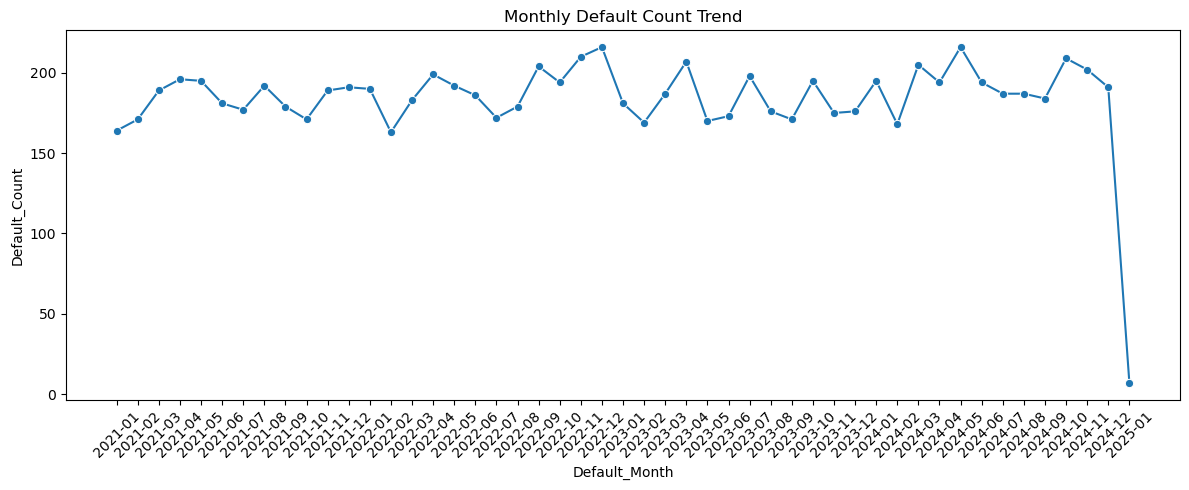

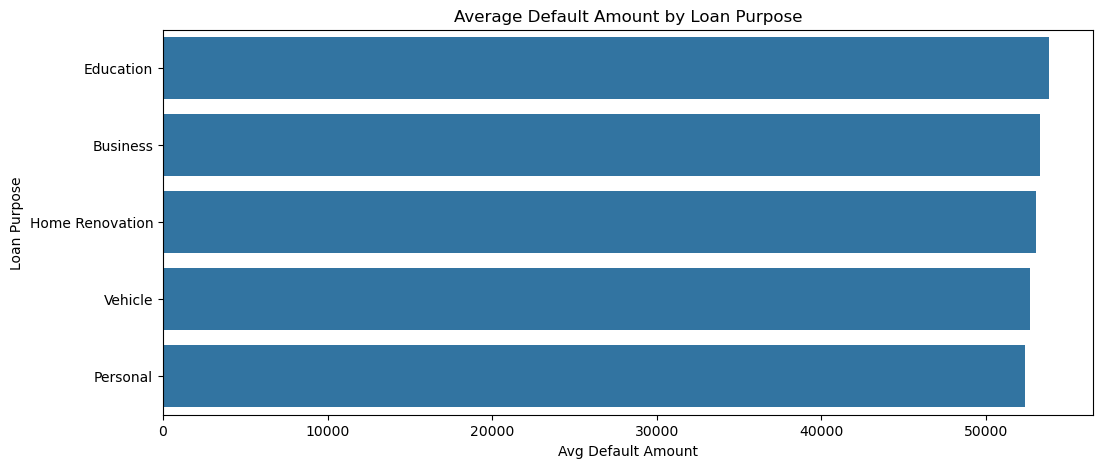

C:\Users\adars\AppData\Local\Temp\ipykernel_20596\290812301.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_default = customer_defaults.groupby('Income_Segment').agg(


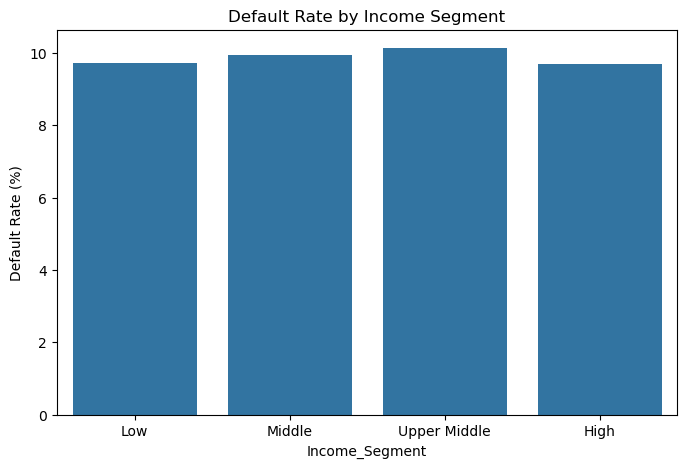

In [213]:
#convert default_Date to extract Month
defaults['Default_Date'] = pd.to_datetime(defaults['Default_Date'])
defaults['Default_Month'] = defaults['Default_Date'].dt.to_period('M')

default_trend = defaults.groupby('Default_Month').size().reset_index(name='Default_Count')
default_trend['Default_Month'] = default_trend['Default_Month'].astype(str)
#Group and plot:

plt.figure(figsize=(12, 5))
sns.lineplot(x='Default_Month', y='Default_Count', data=default_trend, marker='o')
plt.title("Monthly Default Count Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#average default rate by loan purpose
# Merge to get Loan_Purpose
default_purpose = defaults.merge(applications[['Loan_ID', 'Loan_Purpose']], on='Loan_ID', how='left')

avg_default_by_purpose = default_purpose.groupby('Loan_Purpose')['Default_Amount'].mean().reset_index().sort_values('Default_Amount', ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x='Default_Amount', y='Loan_Purpose', data=avg_default_by_purpose)
plt.title("Average Default Amount by Loan Purpose")
plt.xlabel("Avg Default Amount")
plt.ylabel("Loan Purpose")
plt.show()

# Add income category to customers
customers['Income_Segment'] = pd.cut(customers['Annual_Income'],
                                      bins=[0, 300000, 700000, 1500000, float('inf')],
                                      labels=['Low', 'Middle', 'Upper Middle', 'High'])
#Join Default to customer
customer_defaults = loans.merge(defaults[['Loan_ID']], on='Loan_ID', how='left')
customer_defaults['Default_Flag'] = customer_defaults['Loan_ID'].isin(defaults['Loan_ID']).astype(int)

customer_defaults = customer_defaults.merge(customers[['Customer_ID', 'Income_Segment']], on='Customer_ID', how='left')

#group and calculate rate
income_default = customer_defaults.groupby('Income_Segment').agg(
    Total_Customers=('Customer_ID', 'count'),
    Defaults=('Default_Flag', 'sum')
).reset_index()

income_default['Default_Rate'] = (income_default['Defaults'] / income_default['Total_Customers']) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x='Income_Segment', y='Default_Rate', data=income_default)
plt.title("Default Rate by Income Segment")
plt.ylabel("Default Rate (%)")
plt.show()







15. Branch Efficiency
● Calculate the average loan disbursement time for each branch.
● Identify branches with the highest number of rejected applications.
● Compare branch efficiency based on customer satisfaction metrics (if
available).


   Branch_ID  Disbursement_Days
32      B033                161
22      B023                161
30      B031                161
44      B045                161
10      B011                161
38      B039                161
4       B005                161
20      B021                161
27      B028                168
7       B008                168


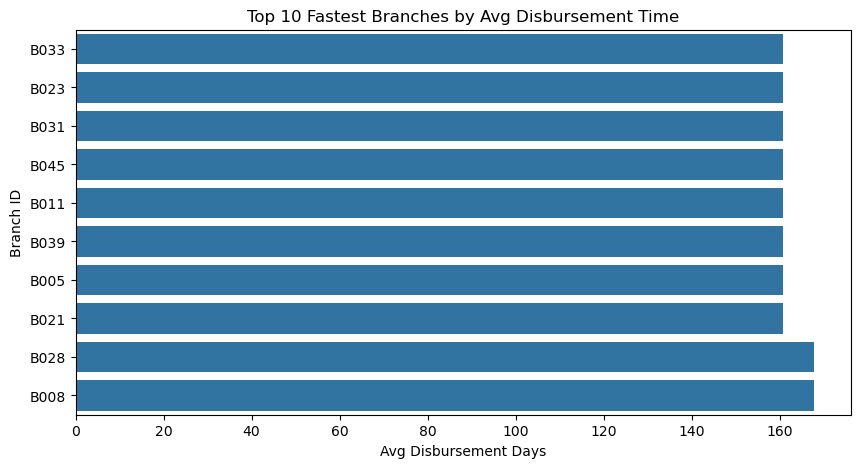

In [217]:
# Average Loan Disbursement Time per Branch
#Step A: Calculate disbursement time
applications['Application_Date'] = pd.to_datetime(applications['Application_Date'])
loans['Disbursal_Date'] = pd.to_datetime(loans['Disbursal_Date'])

loan_app = loans.merge(applications[['Loan_ID', 'Application_Date']], on='Loan_ID', how='left')
loan_app['Disbursement_Days'] = (loan_app['Disbursal_Date'] - loan_app['Application_Date']).dt.days

#Step B: Add Branch ID (via Region → Branch)
loan_app = loan_app.merge(customers[['Customer_ID', 'Region']], on='Customer_ID', how='left')
loan_app = loan_app.merge(branches[['Region', 'Branch_ID']], on='Region', how='left')

#Step C: Group by Branch
branch_disb_time = loan_app.groupby('Branch_ID')['Disbursement_Days'].mean().reset_index().sort_values('Disbursement_Days')

print(branch_disb_time.head(10))  # Fastest branches

#Visulisation

plt.figure(figsize=(10, 5))
sns.barplot(x='Disbursement_Days', y='Branch_ID', data=branch_disb_time.head(10))
plt.title("Top 10 Fastest Branches by Avg Disbursement Time")
plt.xlabel("Avg Disbursement Days")
plt.ylabel("Branch ID")
plt.show()



16. Time-Series Analysis
● Analyze monthly loan disbursement trends over the last 5 years.
● Identify seasonal patterns in loan applications and disbursements.
● Compare monthly default rates across regions.

C:\Users\adars\AppData\Local\Temp\ipykernel_20596\271888920.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_5yr['Disbursal_Month'] = loans_5yr['Disbursal_Date'].dt.to_period('M')


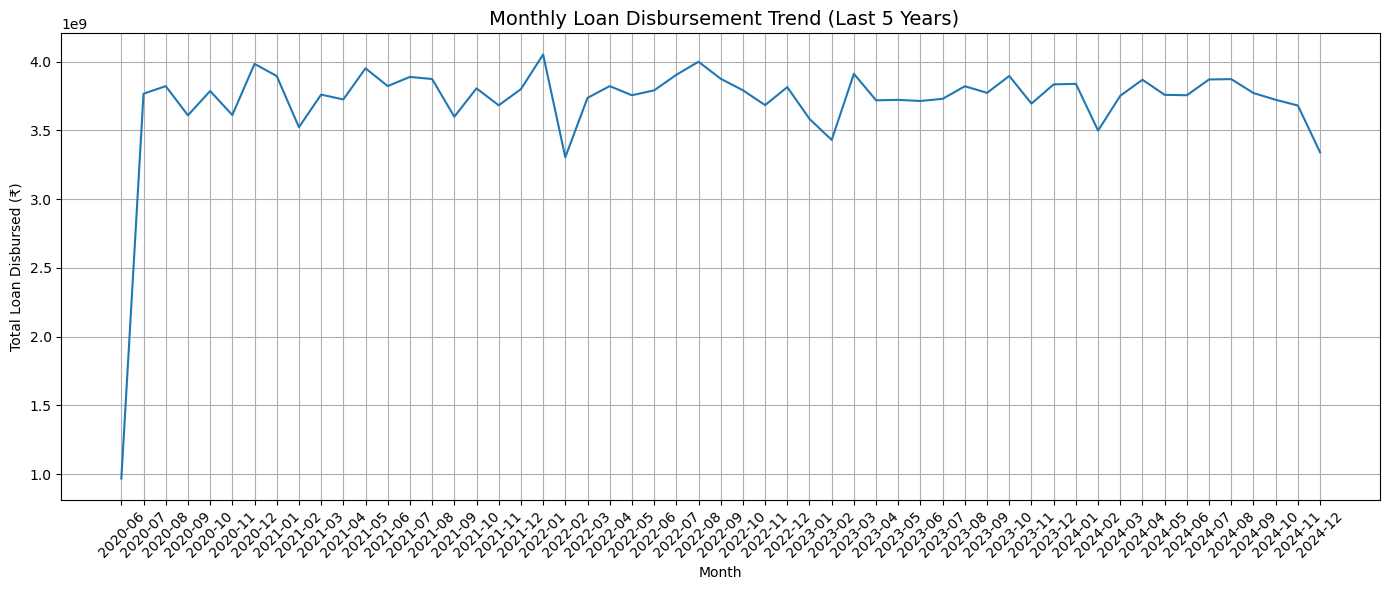

In [233]:
 
# Filter last 5 years
today = pd.Timestamp.today()
five_years_ago = today - pd.DateOffset(years=5)
loans_5yr = loans[loans['Disbursal_Date'] >= five_years_ago]
loans_5yr.head()
# Create monthly column
loans_5yr['Disbursal_Month'] = loans_5yr['Disbursal_Date'].dt.to_period('M')

# Group and sum disbursed amount
monthly_disbursement = loans_5yr.groupby('Disbursal_Month')['Loan_Amount'].sum().reset_index()
monthly_disbursement['Disbursal_Month'] = monthly_disbursement['Disbursal_Month'].astype(str)

plt.figure(figsize=(14, 6))
sns.lineplot(x='Disbursal_Month', y='Loan_Amount', data=monthly_disbursement)

plt.title(' Monthly Loan Disbursement Trend (Last 5 Years)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Loan Disbursed (₹)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()





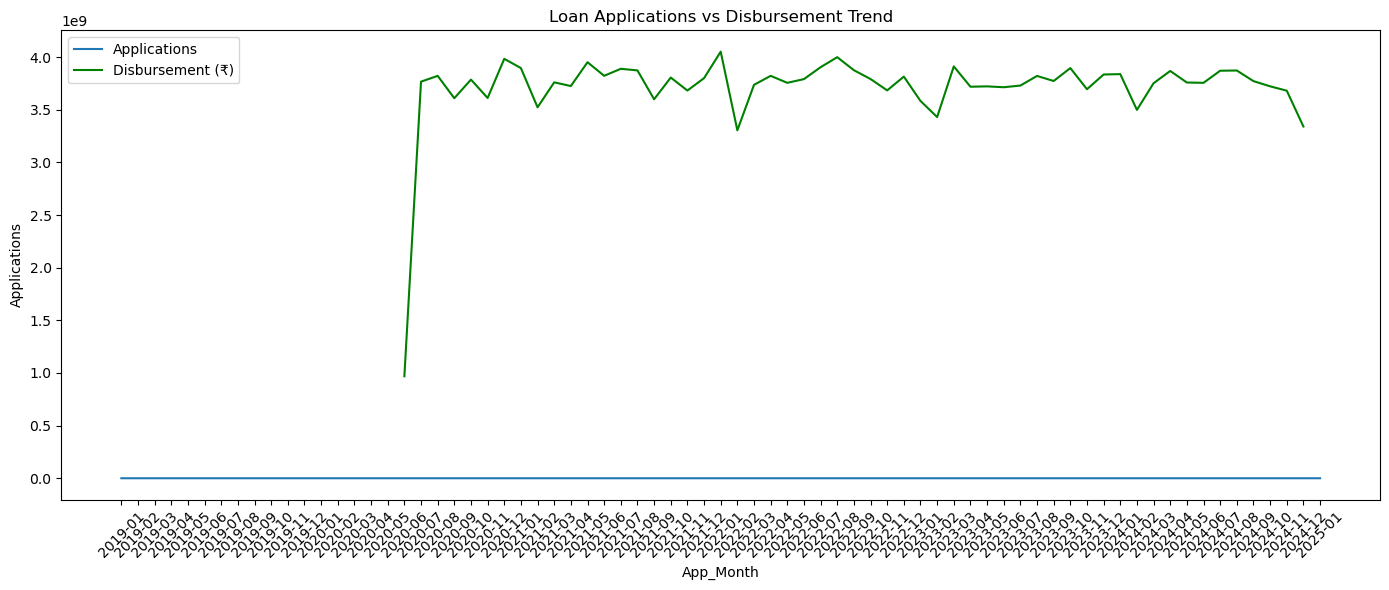

In [235]:
#seasonal pattern in applications and disbursement
applications['Application_Date'] = pd.to_datetime(applications['Application_Date'])
applications['App_Month'] = applications['Application_Date'].dt.to_period('M')

app_trend = applications.groupby('App_Month').size().reset_index(name='Applications')
app_trend['App_Month'] = app_trend['App_Month'].astype(str)

plt.figure(figsize=(14, 6))
sns.lineplot(x='App_Month', y='Applications', data=app_trend, label='Applications')
sns.lineplot(x='Disbursal_Month', y='Loan_Amount', data=monthly_disbursement, label='Disbursement (₹)', color='green')
plt.title("Loan Applications vs Disbursement Trend")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
